In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [4]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import AdaBoostClassifier


In [5]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

scaler = MinMaxScaler()


In [7]:
from __future__ import print_function
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[]


In [11]:
from google.colab import files
uploaded = files.upload()

Saving train_imperson_without4n7_balanced_data.csv to train_imperson_without4n7_balanced_data (1).csv
Saving test_imperson_without4n7_balanced_data.csv to test_imperson_without4n7_balanced_data.csv


In [12]:
import io


In [ ]:
#Baseline Model Performance


In [ ]:
df_train.drop_duplicates(keep='first', inplace=True)
df_test.drop_duplicates(keep='first', inplace=True)


In [ ]:
classifiers = [AdaBoostClassifier(), 
               XGBClassifier(), 
               LogisticRegression(),
              DecisionTreeClassifier(),
              RandomForestClassifier()]

In [ ]:
target_col = '155'
X_train = df_train.drop(columns = target_col)
y_train = df_train[target_col]

In [ ]:
target_col = '155'
X_test = df_test.drop(columns = target_col)
y_test = df_test[target_col]

In [ ]:
#Creating a preprocessor pipeline

In [ ]:
float_feature = X_train.select_dtypes("float64").columns
integer_features = X_train.select_dtypes("int64").columns

In [ ]:
int_transformation = make_pipeline(VarianceThreshold(), PowerTransformer(method = 'yeo-johnson'), MinMaxScaler())
float_transformation = make_pipeline(VarianceThreshold(), PowerTransformer(method = 'yeo-johnson'), MinMaxScaler())


In [ ]:
preprocessor = make_column_transformer((int_transformation, integer_features), (float_transformation, float_feature))

In [ ]:
# Gridsearch

In [ ]:
#Logistic Regression

In [ ]:
pipe = make_pipeline(preprocessor, LogisticRegression())

In [ ]:
param_grid_logreg = {}
grid_logreg = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_logreg, cv=5)

grid_logreg.fit(X_train, y_train)

print("Best score:", grid_logreg.best_score_)
print("Best parameters:", grid_logreg.best_params_)



In [ ]:
log_reg_best_model = grid_logreg.best_estimator_


In [ ]:
y_test_pred = log_reg_best_model.predict(X_test)

In [ ]:
metric = "precision"
y_test_pred = log_reg_best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Scoring metric in GridSearchCV: {metric}\n")
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"MCC score: {mcc}")
print(f"F1 score:")
print(f1_score(y_test, y_test_pred))

In [ ]:
#Adaboost

In [ ]:
pipe = make_pipeline(preprocessor, AdaBoostClassifier())

In [ ]:
param_grid_adaboost = {}
grid_adaboost = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_adaboost, cv=5)

grid_adaboost.fit(X_train, y_train)

print("Best score:", grid_adaboost.best_score_)
print("Best parameters:", grid_adaboost.best_params_)



In [ ]:
ada_best_model = grid_adaboost.best_estimator_


In [ ]:
metric = "precision"
y_test_pred = ada_best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Scoring metric in GridSearchCV: {metric}\n")
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"MCC score: {mcc}")
print(f"F1 score:")
print(f1_score(y_test, y_test_pred))

In [ ]:
#XGBoost

In [ ]:
pipe = make_pipeline(preprocessor, XGBClassifier())

In [ ]:
param_grid_xgb = {}

grid_xgb = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_xgb, cv=5)

grid_xgb.fit(X_train, y_train)

print("Best score:", grid_xgb.best_score_)
print("Best parameters:", grid_xgb.best_params_)

In [ ]:
xgb_best_model = grid_xgb.best_estimator_

metric = "precision"
y_test_pred = xgb_best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Scoring metric in GridSearchCV: {metric}\n")
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"MCC score: {mcc}")
print(f"F1 score:")
print(f1_score(y_test, y_test_pred))

In [ ]:
#Random Forest

In [ ]:
pipe = make_pipeline(preprocessor, RandomForestClassifier())


In [ ]:
param_grid_rf = {}
grid_rf = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_rf, cv=5)

grid_rf.fit(X_train, y_train)

print("Best score:", grid_rf.best_score_)
print("Best parameters:", grid_rf.best_params_)

In [ ]:
rf_best_model = grid_rf.best_estimator_

metric = "precision"
y_test_pred = rf_best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Scoring metric in GridSearchCV: {metric}\n")
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"MCC score: {mcc}")
print(f"F1 score:")
print(f1_score(y_test, y_test_pred))

In [ ]:
#Decision Tree

In [ ]:
pipe = make_pipeline(preprocessor, DecisionTreeClassifier())


In [ ]:
param_grid_dt = {}
decision_tree_model = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_dt, cv=5)
decision_tree_model.fit(X_train, y_train)

print("Best score:", decision_tree_model.best_score_)
print("Best parameters:", decision_tree_model.best_params_)

In [ ]:
decision_tree_model = decision_tree_model.best_estimator_


In [ ]:
y_test_pred = decision_tree_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score: {accuracy}")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print(f"MCC score: {mcc}")
print(f1_score(y_test, y_test_pred))

**Baseline Results for the the dataset were established.**

In [ ]:
#

**Original Dataset (Baseline) with Chisquared as a feature selector**

In [ ]:
df_train = pd.read_csv("train_imperson_without4n7_balanced_data.csv")
df_test = pd.read_csv("test_imperson_without4n7_balanced_data.csv")

In [ ]:
target_col = '155'
X_train = df_train.drop(columns = target_col)
y_train = df_train[target_col]

In [ ]:
target_col = '155'
X_test = df_test.drop(columns = target_col)
y_test = df_test[target_col]

In [ ]:
test = SelectKBest(score_func=chi2, k=20)
fit = test.fit(X_train, y_train)

In [ ]:
#Chi Squared Feature Selection

In [ ]:
set_printoptions(precision=20)
print(fit.scores_)
features = fit.transform(X_train)

In [ ]:
print(features[0:20,:])

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
featureScores.columns = ['feature','Score']

In [ ]:
print(featureScores.nlargest(10,'Score'))

In [ ]:
float_feature = X_train.select_dtypes("float64").columns
integer_features = X_train.select_dtypes("int64").columns

In [ ]:
int_transformation = make_pipeline(VarianceThreshold(),PowerTransformer(method = 'yeo-johnson'), MinMaxScaler())
float_transformation = make_pipeline(VarianceThreshold(),PowerTransformer(method = 'yeo-johnson'), MinMaxScaler())




In [ ]:
preprocessor = make_column_transformer((int_transformation, integer_features), (float_transformation, float_feature))

In [ ]:
#Logistic Regression

In [ ]:
pipe = make_pipeline(preprocessor,SelectKBest(chi2), LogisticRegression())

In [ ]:
param_grid_logreg = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82], 'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
grid_logreg = GridSearchCV(estimator = pipe, param_grid=param_grid_logreg, scoring="accuracy", n_jobs=-1, cv=5)

grid_logreg.fit(X_train, y_train)

print("Best score:", grid_logreg.best_score_)
print("Best parameters:", grid_logreg.best_params_)



In [ ]:
log_reg_best_model = grid_logreg.best_estimator_

y_test_pred = log_reg_best_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score: {accuracy}")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print(f"MCC score: {mcc}")
print(f1_score(y_test, y_test_pred))

In [ ]:
# XGBoost


In [ ]:
pipe = make_pipeline(preprocessor,SelectKBest(chi2), XGBClassifier())

In [ ]:
param_grid_xgb = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82]}
grid_xgb = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_xgb, cv=5)

grid_xgb.fit(X_train, y_train)

print("Best score:", grid_xgb.best_score_)
print("Best parameters:", grid_xgb.best_params_)

In [ ]:
xgb_best_model = grid_xgb.best_estimator_

y_test_pred = xgb_best_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score: {accuracy}")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print(f"MCC score: {mcc}")
print(f1_score(y_test, y_test_pred))

In [ ]:
# Adaboost

In [ ]:
pipe = make_pipeline(preprocessor, SelectKBest(chi2), AdaBoostClassifier())

In [ ]:
param_grid_adaboost = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82]}
grid_adaboost = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_adaboost, n_jobs=-1, cv=5)
grid_adaboost.fit(X_train, y_train)
print("Best score:", grid_adaboost.best_score_)
print("Best parameters:", grid_adaboost.best_params_)


In [ ]:
ada_best_model = grid_adaboost.best_estimator_

y_test_pred = ada_best_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score: {accuracy}")
print('precision: {}'.formata(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print(f"MCC score: {mcc}")
print(f1_score(y_test, y_test_pred))

In [ ]:
# RandomForest

In [ ]:
pipe = make_pipeline(preprocessor, SelectKBest(chi2), RandomForestClassifier())
param_grid_rf = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82]}


In [ ]:
grid_rf = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_rf, n_jobs=-1, cv=5)
grid_rf.fit(X_train, y_train)

print("Best score:", grid_rf.best_score_)
print("Best parameters:", grid_rf.best_params_)

In [ ]:
rf_best_model = grid_rf.best_estimator_
y_test_pred = rf_best_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score: {accuracy}")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print(f"MCC score: {mcc}")
print(f1_score(y_test, y_test_pred))

In [ ]:
# Decision Tree


In [ ]:
pipe = make_pipeline(preprocessor,SelectKBest(chi2), DecisionTreeClassifier())

In [ ]:
param_grid_dt = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82]}
grid_dt = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_dt, n_jobs=-1, cv=5)
grid_dt.fit(X_train, y_train)

print("Best score:", grid_dt.best_score_)
print("Best parameters:", grid_dt.best_params_)

In [ ]:
dt_best_model = grid_dt.best_estimator_
y_test_pred = dt_best_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score: {accuracy}")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print(f"MCC score: {mcc}")
print(f1_score(y_test, y_test_pred))

**# Original Dataset + XGboost feature selection**

In [ ]:
df_train = pd.read_csv("train_imperson_without4n7_balanced_data.csv")
df_test = pd.read_csv("test_imperson_without4n7_balanced_data.csv")

In [ ]:
target_col = '155'
X_train = df_train.drop(columns = target_col)
y_train = df_train[target_col]

In [ ]:
target_col = '155'
X_test = df_test.drop(columns = target_col)
y_test = df_test[target_col]

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
plot_importance(xgb, max_num_features = 20)
plt.show()

In [ ]:
xgb_top_20 = [38, 8, 82, 64,61, 5, 119, 67, 77, 107, 112, 76, 111, 79, 108, 118, 75, 47, 68, 78]

In [ ]:
X_train = X_train.drop(columns=[col for col in X_train if int(col) not in xgb_top_20])


In [ ]:
#Reducing the Test DF

In [ ]:
X_test = X_test.drop(columns=[col for col in X_test if int(col) not in xgb_top_20])


In [ ]:
# Pipeline to test the reduced dataset with selected features from Xgb


In [ ]:
#Logistic Regression

In [ ]:
pipe = make_pipeline(preprocessor, LogisticRegression())

In [ ]:
param_grid_logreg = {'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
grid_logreg = GridSearchCV(estimator = pipe, param_grid=param_grid_logreg, scoring="precision", cv=5)

grid_logreg.fit(X_train, y_train)

print("Best score:", grid_logreg.best_score_)
print("Best parameters:", grid_logreg.best_params_)



In [ ]:
log_reg_best_model = grid_logreg.best_estimator_
y_test_pred = log_reg_best_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score: {accuracy}")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print(f"MCC score: {mcc}")
print(classification_report(y_test, y_test_pred))

In [ ]:
# XGBoost

In [ ]:
pipe = make_pipeline(preprocessor, XGBClassifier())

In [ ]:
param_grid_xgb = {}

In [ ]:
grid_xgb = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_xgb, cv=5)

grid_xgb.fit(X_train, y_train)

print("Best score:", grid_xgb.best_score_)
print("Best parameters:", grid_xgb.best_params_)

In [ ]:
xgb_best_model = grid_xgb.best_estimator_
y_test_pred = xgb_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# Adaboost

In [ ]:
pipe = make_pipeline(preprocessor, AdaBoostClassifier())

In [ ]:
param_grid_ada = {}

In [ ]:
grid_ada = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_ada, cv=5)

grid_ada.fit(X_train, y_train)

print("Best score:", grid_ada.best_score_)
print("Best parameters:", grid_ada.best_params_)

In [ ]:
ada_best_model = grid_ada.best_estimator_
y_test_pred = ada_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# Decision Tree

In [ ]:
pipe = make_pipeline(preprocessor, DecisionTreeClassifier())

In [ ]:
param_grid_dt = {}
grid_dt = GridSearchCV(estimator = pipe, scoring="precision", param_grid=param_grid_dt, cv=5)

grid_dt.fit(X_train, y_train)

print("Best score:", grid_dt.best_score_)
print("Best parameters:", grid_dt.best_params_)

In [ ]:
dt_best_model = grid_dt.best_estimator_


In [ ]:
y_test_pred = dt_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
#Autoencoder for feature generation and feature selection

In [13]:
df = pd.read_csv(io.BytesIO(uploaded['train_imperson_without4n7_balanced_data.csv']))


In [14]:
df_test = pd.read_csv(io.BytesIO(uploaded['test_imperson_without4n7_balanced_data.csv']))


In [15]:
df.shape

(97044, 153)

In [16]:
df

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36865,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36867,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36871,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36876,0,0,0,0,...,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36880,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97039,0,0,0,0.035953,0.035953,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93345,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97040,0,0,0,0.018075,0.018075,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93348,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97041,0,0,0,0.041889,0.041889,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93350,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97042,0,0,0,0.004191,0.004191,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93352,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1


# **Preprocessing**

In [17]:
df.loc[df.isna().any(axis=1)] #No NaN values

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155


In [ ]:
df_test.loc[df.isna().any(axis=1)] #No NaN values

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155


In [ ]:
df_test

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.002547,0.002547,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88219,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.222150,0.00000,0.47729,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
1,0,0,0,0.003296,0.003296,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.351060,0.00000,0.18516,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
2,0,0,0,0.003285,0.003285,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.437000,0.00000,0.47541,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
3,0,0,0,0.005942,0.005942,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.000000,0
4,0,0,0,0.001519,0.001519,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.636210,0.00000,0.89971,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40153,0,0,0,0.001682,0.001682,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.32183,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40154,0,0,0,0.002361,0.002361,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.48142,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40155,0,0,0,0.002971,0.002971,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.47634,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40156,0,0,0,0.009523,0.009523,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.47634,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1


# Checking for duplicates

In [ ]:
df.duplicated(keep = "first").sum()

547

In [ ]:
df_test.duplicated(keep = "first").sum()

280

In [18]:
df.drop_duplicates(keep='first', inplace=True)


In [19]:
df_test.drop_duplicates(keep='first', inplace=True)


In [20]:
len(df[df.duplicated()]) # Duplicates removed

0

In [ ]:
len(df_test[df_test.duplicated()]) # Duplicates removed

0

In [ ]:
df

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36865,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36867,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36871,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36876,0,0,0,0,...,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36880,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97039,0,0,0,0.035953,0.035953,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93345,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97040,0,0,0,0.018075,0.018075,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93348,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97041,0,0,0,0.041889,0.041889,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93350,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97042,0,0,0,0.004191,0.004191,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93352,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1


In [ ]:
df_test

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.002547,0.002547,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88219,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.222150,0.00000,0.47729,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
1,0,0,0,0.003296,0.003296,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.351060,0.00000,0.18516,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
2,0,0,0,0.003285,0.003285,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.437000,0.00000,0.47541,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
3,0,0,0,0.005942,0.005942,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.000000,0
4,0,0,0,0.001519,0.001519,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.636210,0.00000,0.89971,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40153,0,0,0,0.001682,0.001682,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.32183,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40154,0,0,0,0.002361,0.002361,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.48142,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40155,0,0,0,0.002971,0.002971,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.47634,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40156,0,0,0,0.009523,0.009523,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.47634,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1


In [ ]:
#39878 rows x 73 columns]>

# Removing data with zero variance - Training and Test data

In [22]:
selector = VarianceThreshold()
df_transformed = selector.fit_transform(df)
df_numbers = df.columns[selector.get_support()]
df_zv_train= df.loc[:, df_numbers]
df_zv_train



,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,83,84,86,88,89,90,93,94,97,98,104,105,106,107,108,109,110,111,112,113,117,118,119,120,121,122,123,125,126,127,128,129,130,133,138,140,141,142,143,144,145,146,154,155
0,0.000066,0.000066,0.009150,0.009150,1,1,1,1,1,1,1,0.36865,1,0.88679,0.98108,0,1,1,0.70423,1,0.81818,1.0,0.30769,0.5,0,1,0,0,0.003034,0.001127,0.011765,0.001443,0.001440,0.001474,0.946280,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000014,0.000014,0.000000,0.000000,1,1,1,1,1,1,1,0.36867,1,0.43396,0.98108,0,1,1,0.70423,1,0.65909,0.5,1.00000,0.0,0,0,0,0,0.000000,0.002253,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.035528,0.035528,0.070588,0.070588,1,1,1,1,1,1,1,0.36871,1,0.00000,0.98108,1,0,1,0.59155,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.255430,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.048053,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.005128,0.005128,0.094771,0.094771,1,1,1,1,1,1,1,0.36876,1,0.00000,0.98108,1,0,1,0.14085,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.000866,0.000864,0.000885,0.072772,0,0,0,0.0,1,1,1,1,0,1,0.0,0.0,0.0,0.168300,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.035116,0.035116,0.070588,0.070588,1,1,1,1,1,1,1,0.36880,1,0.00000,0.98108,1,0,1,0.61972,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.256900,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.048054,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97039,0.035953,0.035953,0.038562,0.038562,1,1,1,1,1,1,1,0.93345,1,0.00000,0.98108,1,0,1,0.64789,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.217830,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.000000,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97040,0.018075,0.018075,0.038562,0.038562,1,1,1,1,1,1,1,0.93348,1,0.00000,0.98108,1,0,1,0.64789,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.218320,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.000000,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97041,0.041889,0.041889,0.038562,0.038562,1,1,1,1,1,1,1,0.93350,1,0.00000,0.98108,1,0,1,0.64789,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.218560,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.000000,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97042,0.004191,0.004191,0.038562,0.038562,1,1,1,1,1,1,1,0.93352,1,0.00000,0.98108,1,0,1,0.64789,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.218800,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.000000,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,

In [ ]:
#features down to 79 from 155

In [ ]:
df_zv_train

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,83,84,86,88,89,90,93,94,97,98,104,105,106,107,108,109,110,111,112,113,117,118,119,120,121,122,123,125,126,127,128,129,130,133,138,140,141,142,143,144,145,146,154,155
0,0.000066,0.000066,0.009150,0.009150,1,1,1,1,1,1,1,0.36865,1,0.88679,0.98108,0,1,1,0.70423,1,0.81818,1.0,0.30769,0.5,0,1,0,0,0.003034,0.001127,0.011765,0.001443,0.001440,0.001474,0.946280,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000014,0.000014,0.000000,0.000000,1,1,1,1,1,1,1,0.36867,1,0.43396,0.98108,0,1,1,0.70423,1,0.65909,0.5,1.00000,0.0,0,0,0,0,0.000000,0.002253,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.035528,0.035528,0.070588,0.070588,1,1,1,1,1,1,1,0.36871,1,0.00000,0.98108,1,0,1,0.59155,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.255430,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.048053,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.005128,0.005128,0.094771,0.094771,1,1,1,1,1,1,1,0.36876,1,0.00000,0.98108,1,0,1,0.14085,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.000866,0.000864,0.000885,0.072772,0,0,0,0.0,1,1,1,1,0,1,0.0,0.0,0.0,0.168300,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.035116,0.035116,0.070588,0.070588,1,1,1,1,1,1,1,0.36880,1,0.00000,0.98108,1,0,1,0.61972,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.256900,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.048054,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97039,0.035953,0.035953,0.038562,0.038562,1,1,1,1,1,1,1,0.93345,1,0.00000,0.98108,1,0,1,0.64789,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.217830,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.000000,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97040,0.018075,0.018075,0.038562,0.038562,1,1,1,1,1,1,1,0.93348,1,0.00000,0.98108,1,0,1,0.64789,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.218320,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.000000,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97041,0.041889,0.041889,0.038562,0.038562,1,1,1,1,1,1,1,0.93350,1,0.00000,0.98108,1,0,1,0.64789,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.218560,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.000000,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97042,0.004191,0.004191,0.038562,0.038562,1,1,1,1,1,1,1,0.93352,1,0.00000,0.98108,1,0,1,0.64789,1,0.18182,0.0,0.61538,0.0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0.218800,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.000000,0.00153,0.0,0.0,0,0.0,0.0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,

In [ ]:
len(df_transformed)

96497

# Test Data

In [23]:
selector = VarianceThreshold()
df_transformed = selector.fit_transform(df_test)
df_numbers = df_test.columns[selector.get_support()]
df_zv_test= df_test.loc[:, df_numbers]
df_zv_test.head

<bound method NDFrame.head of               5         6         8         9  ...      146  148       154  155
0      0.002547  0.002547  0.988240  0.988240  ...  0.16667    0  0.986740    0
1      0.003296  0.003296  0.988240  0.988240  ...  0.16667    0  0.986740    0
2      0.003285  0.003285  0.988240  0.988240  ...  0.16667    0  0.986740    0
3      0.005942  0.005942  0.000000  0.000000  ...  0.00000    0  0.000000    0
4      0.001519  0.001519  0.988240  0.988240  ...  0.16667    0  0.986740    0
...         ...       ...       ...       ...  ...      ...  ...       ...  ...
40153  0.001682  0.001682  0.016993  0.016993  ...  0.00000    0  0.002652    1
40154  0.002361  0.002361  0.016993  0.016993  ...  0.00000    0  0.002652    1
40155  0.002971  0.002971  0.016993  0.016993  ...  0.00000    0  0.002652    1
40156  0.009523  0.009523  0.016993  0.016993  ...  0.00000    0  0.002652    1
40157  0.003311  0.003311  0.016993  0.016993  ...  0.00000    0  0.002652    1

[39878 ro

In [24]:
zv_test = list(df_zv_test.columns)

In [ ]:
zv_test

['5',
 '6',
 '8',
 '9',
 '14',
 '15',
 '16',
 '18',
 '20',
 '26',
 '29',
 '38',
 '43',
 '47',
 '48',
 '50',
 '51',
 '52',
 '61',
 '62',
 '64',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '89',
 '90',
 '93',
 '94',
 '98',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '148',
 '154',
 '155']

In [25]:
zv_train = list(df_zv_train.columns)

In [ ]:
# Intersection

In [26]:
zv_list = list(set(zv_train) & set(zv_test))


In [27]:
type(zv_list)

list

In [28]:
zv_train

['5',
 '6',
 '8',
 '9',
 '14',
 '15',
 '16',
 '18',
 '20',
 '26',
 '29',
 '38',
 '43',
 '47',
 '48',
 '50',
 '51',
 '52',
 '61',
 '62',
 '64',
 '66',
 '67',
 '68',
 '70',
 '71',
 '72',
 '73',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '82',
 '83',
 '84',
 '86',
 '88',
 '89',
 '90',
 '93',
 '94',
 '97',
 '98',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '133',
 '138',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '154',
 '155']

In [29]:
df_zv_train = df_zv_train.drop(columns=[col for col in df_zv_train if col not in zv_list])


In [30]:
len(df_zv_train.columns)

70

In [31]:
df_zv_test = df_zv_test.drop(columns=[col for col in df_zv_test if col not in zv_list])


In [32]:
len(df_zv_test.columns)

70

# Data Transformation

In [ ]:
#Data Transformation - Scaling/Power Transformer

In [ ]:
#Power transform reduces skew and gives us a Gaussian distribution

In [33]:
pt = PowerTransformer(method = 'yeo-johnson').fit(df_zv_train) 
powered_df = pt.transform(df_zv_train)

In [34]:
powered_df.shape


(96497, 70)

In [35]:
gaussian_train  = pd.DataFrame(data = powered_df, columns = df_zv_train.columns)

In [36]:
gaussian_train.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
96492    0
96493    0
96494    0
96495    0
96496    0
Length: 96497, dtype: int64

In [ ]:
# PowerTransformer on Test Data

In [37]:
pt = PowerTransformer(method = 'yeo-johnson').fit(df_zv_test) 
powered_test_df = pt.transform(df_zv_test)

In [38]:
powered_test_df.shape

(39878, 70)

In [39]:
gaussian_test  = pd.DataFrame(data = powered_test_df, columns = df_zv_test.columns)

In [40]:
gaussian_test.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
39873    0
39874    0
39875    0
39876    0
39877    0
Length: 39878, dtype: int64

# **Scaling Test and Training Data**

In [ ]:
#Scaling Training

In [41]:
scaler = MinMaxScaler()

In [42]:
gaussian_train

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,104,105,106,107,108,109,110,111,112,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155
0,-1.524173,-1.524173,-0.882513,-0.882513,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,-2.224344,0.014754,1.588269,0.001142,-1.528887,1.529680,0.014754,1.026920,0.014754,0.663930,0.633442,0.053425,-0.794371,-0.286334,1.396774,-0.032208,-1.538606,0.960772,-0.163239,0.152718,-0.057495,-0.740509,0.434902,1.741413,0.014754,-0.30933,-0.237709,-0.170437,-0.307093,-0.0599,-0.005576,-0.029517,-0.184848,-0.294557,-0.062711,-0.257535,-0.021358,-0.07382,-0.315584,-0.297354,-0.296959,-0.068601,-0.194401,-0.024943,-0.039325,-0.148789,-0.148789,-0.148789,-0.148789,-0.148789,-1.149408,-0.10614,-1.163961,-0.105958,-0.028805,-0.455019,-0.455019,-0.787057,-0.995647
1,-1.549915,-1.549915,-1.087802,-1.087802,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,-2.224284,0.014754,1.240613,0.001142,-1.528887,1.529680,0.014754,1.026920,0.014754,-0.387465,-1.309592,1.370635,-1.477721,-0.286334,-0.715935,-0.032208,-1.538606,-0.653114,0.654049,-1.199407,-2.040639,-1.418887,-2.320228,-1.399526,0.014754,-0.30933,-0.237709,-0.170437,-0.307093,-0.0599,-0.005576,-0.029517,-0.184848,-0.294557,-0.062711,-0.257535,-0.021358,-0.07382,-0.315584,-0.297354,-0.296959,-0.068601,-0.194401,-0.024943,-0.039325,-0.148789,-0.148789,-0.148789,-0.148789,-0.148789,-1.149408,-0.10614,-1.163961,-0.105958,-0.028805,-0.455019,-0.455019,-0.787057,-0.995647
2,2.620442,2.620442,0.161825,0.161825,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,-2.224164,0.014754,-0.671226,0.001142,0.654071,-0.653731,0.014754,-0.691206,0.014754,-1.832953,-1.762759,0.754984,-1.477721,-0.286334,-0.715935,-0.032208,-1.538606,-0.653114,-0.683780,-0.441762,0.288068,-0.612425,0.434902,0.705914,0.014754,3.23279,4.206821,-0.170437,3.256344,-0.0599,-0.005576,-0.029517,5.459369,3.394933,-0.062711,-0.257535,-0.021358,-0.07382,3.168730,3.579865,3.367792,-0.068601,5.143999,-0.024943,-0.039325,-0.148789,-0.148789,-0.148789,-0.148789,-0.148789,-1.149408,-0.10614,-1.163961,-0.105958,-0.028805,-0.455019,-0.455019,-0.787057,-0.995647
3,0.372824,0.372824,0.452384,0.452384,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,-2.224014,0.014754,-0.671226,0.001142,0.654071,-0.653731,0.014754,-2.438465,0.014754,-1.832953,-1.762759,0.754984,-1.477721,-0.286334,-0.715935,-0.032208,-1.538606,-0.653114,-0.683780,-0.441762,-0.797383,-1.004131,-0.623368,-0.512509,0.014754,3.23279,4.206821,5.867260,3.256344,-0.0599,-0.005576,-0.029517,5.459369,3.394933,-0.062711,-0.257535,-0.021358,-0.07382,3.168730,3.353200,3.367792,-0.068601,5.143999,-0.024943,-0.039325,6.720924,6.720924,6.720924,6.720924,6.720924,-1.149408,-0.10614,-1.163961,-0.105958,-0.028805,-0.455019,-0.455019,-0.787057,-0.995647
4,2.617171,2.617171,0.161825,0.161825,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,-2.223893,0.014754,-0.671226,0.001142,0.654071,-0.653731,0.014754,-0.352919,0.014754,-1.832953,-1.762759,0.754984,-1.477721,-0.286334,-0.715935,-0.032208,-1.538606,-0.653114,-0.683780,-0.441762,0.288068,-0.612425,0.434902,0.712169,0.014754,3.23279,4.206821,-0.170437,3.256344,-0.0599,-0.005576,-0.029517,5.459369,3.394933,-0.062711,-0.257535,-0.021358,-0.07382,3.168730,3.579865,3.367792,14.577000,5.143999,-0.024943,-0.039325,-0.148789,-0.148789,-0.148789,-0.148789,-0.148789,-1.149408,-0.10614,-1.163961,-0.105958,-0.028805,-0.455019,-0.455019,-0.787057,-0.995647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,2.623657,2.623657,-0.318240,-0.318240,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,0.014754,2.930591,0.014754,-0

In [43]:
scaler.fit(gaussian_train)


MinMaxScaler()

In [44]:
scaled_data_train = scaler.transform(gaussian_train)

In [45]:
scaler.fit(gaussian_test)

MinMaxScaler()

In [46]:
scaled_data_test = scaler.transform(gaussian_test)

In [47]:
scaled_data_test

array([[0.35132835, 0.35132835, 0.99964357, ..., 0.996993  , 0.99969893,
        0.        ],
       [0.42893308, 0.42893308, 0.99964357, ..., 0.996993  , 0.99969893,
        0.        ],
       [0.42780589, 0.42780589, 0.99964357, ..., 0.996993  , 0.99969893,
        0.        ],
       ...,
       [0.39645974, 0.39645974, 0.11026169, ..., 0.        , 0.01951905,
        1.        ],
       [0.8011916 , 0.8011916 , 0.11026169, ..., 0.        , 0.01951905,
        1.        ],
       [0.43033892, 0.43033892, 0.11026169, ..., 0.        , 0.01951905,
        1.        ]])

In [ ]:
#pd.DataFrame(data = scaled_data, columns = df.columns)

NameError: ignored

In [48]:
gaussian_train = pd.DataFrame(scaled_data_train, index=gaussian_train.index, columns=gaussian_train.columns)
gaussian_train

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,104,105,106,107,108,109,110,111,112,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155
0,0.007421,0.007421,0.065226,0.065226,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097940,1.0,0.985318,0.311853,0.0,1.0,1.0,0.210037,1.0,0.601831,1.000000,0.442430,0.311875,0.0,1.0,0.0,0.0,0.552886,0.278274,0.377103,0.201340,0.089565,0.123354,0.993778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001355,0.001355,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097951,1.0,0.833713,0.311853,0.0,1.0,1.0,0.210037,1.0,0.365186,0.189119,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.478906,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.984044,0.984044,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097972,1.0,0.000000,0.311853,1.0,0.0,1.0,0.107429,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.666151,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.454423,0.454423,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097998,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.126222,0.054760,0.075973,0.280648,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.983273,0.983273,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098019,1.0,0.000000,0.311853,1.0,0.0,1.0,0.127632,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.668130,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.984801,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999700,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.610956,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96493,0.880335,0.880335,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.611736,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96494,0.992279,0.992279,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999867,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.612117,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96495,0.390683,0.390683,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999933,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.612498,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [49]:
gaussian_test = pd.DataFrame(scaled_data_test, index=gaussian_test.index, columns=gaussian_test.columns)
gaussian_test

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,104,105,106,107,108,109,110,111,112,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155
0,0.351328,0.351328,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195470,1.0,1.000000,0.381679,0.0,1.0,1.0,0.163331,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.709739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.839382,0.00000,0.884276,0.0,0.0,0.996993,0.996993,0.999699,0.0
1,0.428933,0.428933,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.163331,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.716484,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.936416,0.00000,0.588692,0.0,0.0,0.996993,0.996993,0.999699,0.0
2,0.427806,0.427806,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.150337,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.720945,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.964450,0.00000,0.883332,0.0,0.0,0.996993,0.996993,0.999699,0.0
3,0.635561,0.635561,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,0.789572,0.381679,0.0,1.0,1.0,0.244763,1.0,0.339866,0.099861,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.520088,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.227296,0.227296,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.163331,1.0,0.767193,1.000000,0.784532,1.0,1.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.731200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990338,0.00000,0.990381,0.0,0.0,0.996993,0.996993,0.999699,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39873,0.248397,0.248397,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.150337,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.428454,0.44513,0.453538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000045,0.99929,0.774620,0.0,0.0,0.000000,0.000000,0.019519,1.0
39874,0.330496,0.330496,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.163331,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.428454,0.44513,0.453538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000045,0.99929,0.886325,0.0,0.0,0.000000,0.000000,0.019519,1.0
39875,0.396460,0.396460,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.163331,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.428454,0.44513,0.453538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000045,0.99929,0.883800,0.0,0.0,0.000000,0.000000,0.019519,1.0
39876,0.801192,0.801192,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.163331,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.999973,0.44513,0.453538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [50]:
gaussian_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39878 entries, 0 to 39877
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5       39878 non-null  float64
 1   6       39878 non-null  float64
 2   8       39878 non-null  float64
 3   9       39878 non-null  float64
 4   14      39878 non-null  float64
 5   15      39878 non-null  float64
 6   16      39878 non-null  float64
 7   18      39878 non-null  float64
 8   20      39878 non-null  float64
 9   26      39878 non-null  float64
 10  29      39878 non-null  float64
 11  38      39878 non-null  float64
 12  43      39878 non-null  float64
 13  47      39878 non-null  float64
 14  48      39878 non-null  float64
 15  50      39878 non-null  float64
 16  51      39878 non-null  float64
 17  52      39878 non-null  float64
 18  61      39878 non-null  float64
 19  62      39878 non-null  float64
 20  64      39878 non-null  float64
 21  66      39878 non-null  float64
 22

In [ ]:
gaussian_train.loc[gaussian_train.isna().any(axis=1)]

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,104,105,106,107,108,109,110,111,112,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155


In [ ]:
gaussian_train


,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,104,105,106,107,108,109,110,111,112,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155
0,0.007421,0.007421,0.065226,0.065226,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097940,1.0,0.985318,0.311853,0.0,1.0,1.0,0.210037,1.0,0.601831,1.000000,0.442430,0.311875,0.0,1.0,0.0,0.0,0.552886,0.278274,0.377103,0.201340,0.089565,0.123354,0.993778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001355,0.001355,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097951,1.0,0.833713,0.311853,0.0,1.0,1.0,0.210037,1.0,0.365186,0.189119,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.478906,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.984044,0.984044,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097972,1.0,0.000000,0.311853,1.0,0.0,1.0,0.107429,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.666151,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.454423,0.454423,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097998,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.126222,0.054760,0.075973,0.280648,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.983273,0.983273,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098019,1.0,0.000000,0.311853,1.0,0.0,1.0,0.127632,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.668130,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.984801,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999700,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.610956,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96493,0.880335,0.880335,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.611736,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96494,0.992279,0.992279,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999867,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.612117,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96495,0.390683,0.390683,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999933,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.612498,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# **Preprocessing Complete** 

# **Feature Selection**

In [51]:
target_col = '155'
X = gaussian_train.drop(columns = target_col)
y = gaussian_train[target_col]

(96497,)

In [ ]:
X

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,104,105,106,107,108,109,110,111,112,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154
0,0.007421,0.007421,0.065226,0.065226,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097940,1.0,0.985318,0.311853,0.0,1.0,1.0,0.210037,1.0,0.601831,1.000000,0.442430,0.311875,0.0,1.0,0.0,0.0,0.552886,0.278274,0.377103,0.201340,0.089565,0.123354,0.993778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001355,0.001355,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097951,1.0,0.833713,0.311853,0.0,1.0,1.0,0.210037,1.0,0.365186,0.189119,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.478906,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.984044,0.984044,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097972,1.0,0.000000,0.311853,1.0,0.0,1.0,0.107429,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.666151,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.454423,0.454423,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097998,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.126222,0.054760,0.075973,0.280648,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.983273,0.983273,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098019,1.0,0.000000,0.311853,1.0,0.0,1.0,0.127632,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.668130,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.984801,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999700,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.610956,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96493,0.880335,0.880335,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.611736,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96494,0.992279,0.992279,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999867,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.612117,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96495,0.390683,0.390683,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999933,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.612498,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X_train = gaussian_train.iloc[:,0:-1] #Features
y_train = gaussian_train.iloc[:,-1]#target

In [56]:
X_test = gaussian_test.iloc[:,0:-1]
y_test = gaussian_test.iloc[:,-1]

In [ ]:
print(X_train.shape, y_train.shape)

(96497, 69) (96497,)


In [ ]:
print(X_test.shape, y_test.shape)

(39878, 69) (39878,)


In [ ]:
X_test.shape

(39878, 69)

In [ ]:
print(X_train.shape)
print(X.shape)
X_train = X_train.values.reshape((len(X_train), np.prod(X_train.values.shape[1:])))
X = X.values.reshape((len(X), np.prod(X.shape[1:])))
print(X_train.shape)
print(X.shape)

(96497, 69)
(96497, 69)
(96497, 69)
(96497, 69)


In [52]:
def auto_encoder_model(p_hidden_size=128, p_code_size=20, sparse=False,
regval=10e-6):
    input_size = 69
    hidden_size = p_hidden_size
    code_size = p_code_size
    input_img = Input(shape=(input_size,))
    hidden_1 = Dense(hidden_size, activation='relu')(input_img)
    if sparse:
        code = Dense(code_size, activation='relu',
        activity_regularizer = l1(regval))(hidden_1)
    else:
        code = Dense(code_size, activation='relu')(hidden_1)
        hidden_2 = Dense(hidden_size, activation='relu')(code)
        output_img = Dense(input_size, activation='sigmoid')(hidden_2)
        autoencoder = Model(input_img, output_img)
        encoded = Model(input_img, code)
    return autoencoder, encoded

In [53]:
autoencoder, encoded = auto_encoder_model()


In [57]:
encoded.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=3)

Epoch 1/3
3016/3016 [==============================] - 6s 2ms/step - loss: 0.1302
Epoch 2/3
3016/3016 [==============================] - 6s 2ms/step - loss: 0.1189
Epoch 3/3
3016/3016 [==============================] - 6s 2ms/step - loss: 0.1185


In [58]:
pred = autoencoder.predict(X_train)


In [59]:
pred.shape

(96497, 69)

In [60]:
encoder_training_data = encoded.predict(X_train)


In [61]:
encoder_test = encoded.predict(X_test)

In [62]:
df_encoder_test_data = pd.DataFrame(encoder_test, index=range(1, encoder_test.shape[0]+1)) 

In [63]:
df_encoder_test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.327752,0.0,0.0,3.150551,9.367138,5.552168,0.0,4.970319,1.985693,5.117180,0.0,6.396951,7.404723,3.215759,1.768449,0.0,1.015499,0.651470,2.938769,10.636729
2,0.284449,0.0,0.0,3.877744,9.201246,5.707528,0.0,5.031887,1.647993,5.841585,0.0,6.171221,7.122376,3.180552,1.941406,0.0,0.631976,1.172651,2.780261,10.745351
3,0.340761,0.0,0.0,3.237171,9.204784,5.438723,0.0,4.917676,1.944105,5.601940,0.0,6.493123,7.528923,3.242331,1.791502,0.0,0.818324,0.744898,2.761552,10.886661
4,4.428220,0.0,0.0,6.966024,2.924381,10.566216,0.0,5.605270,8.039594,5.119322,0.0,4.670769,4.546608,6.604715,3.786843,0.0,4.924589,6.154027,0.150928,2.196949
5,1.399057,0.0,0.0,2.817339,8.410394,5.306993,0.0,1.805304,0.885763,5.354398,0.0,5.552749,6.569469,1.584970,1.621389,0.0,1.862970,0.000000,0.568073,12.321400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39874,2.672368,0.0,0.0,0.000000,4.084022,2.206336,0.0,7.922559,2.028191,2.113185,0.0,4.058628,1.073689,8.739302,4.947472,0.0,5.034466,3.769825,4.093707,6.297098
39875,2.660133,0.0,0.0,0.000000,3.755223,2.216827,0.0,7.838723,2.042281,2.295963,0.0,4.457627,1.266980,8.799199,4.877553,0.0,4.996590,3.507794,3.977391,6.263038
39876,2.650984,0.0,0.0,0.000000,3.501374,2.277350,0.0,7.823000,1.961273,2.509009,0.0,4.668158,1.279573,8.831528,4.895236,0.0,4.925488,3.447864,3.912170,6.236728
39877,2.583217,0.0,0.0,0.000000,2.077951,2.836358,0.0,7.266219,1.329519,3.902703,0.0,5.562905,1.530635,9.614361,4.860575,0.0,4.050149,2.969707,4.534959,6.363591


In [64]:
print(encoder_training_data.shape)

(96497, 20)


In [65]:
df_encoder_training = pd.DataFrame(encoder_training_data, index=range(1, encoder_training_data.shape[0]+1)) 

In [66]:
df_encoder_training

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,3.880562,0.0,0.0,2.848277,1.728108,6.534740,0.0,1.939080,4.005094,0.000000,0.0,3.346194,3.117483,1.085704,2.096372,0.0,4.002477,8.575889,3.781561,6.313128
2,4.886083,0.0,0.0,6.724692,5.159849,10.395726,0.0,5.499273,8.810287,3.229943,0.0,2.478136,4.271635,5.983754,3.811409,0.0,5.494997,6.651607,0.416103,2.432531
3,6.596888,0.0,0.0,17.176018,1.463856,2.538291,0.0,6.720051,4.198252,5.133149,0.0,4.502271,1.302566,9.987926,3.359228,0.0,1.237534,1.741639,9.024344,0.926887
4,2.072320,0.0,0.0,20.059792,4.047960,2.602390,0.0,4.177844,1.829497,4.138071,0.0,0.364758,0.000000,6.214843,3.817609,0.0,2.814231,2.957175,12.415911,1.578116
5,5.056574,0.0,0.0,15.624035,0.770193,1.422503,0.0,9.199830,4.947566,5.642376,0.0,3.920745,0.571168,11.857220,4.340219,0.0,0.000000,1.575645,9.110988,0.292312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96493,7.782713,0.0,0.0,15.450570,2.644218,3.593851,0.0,6.478227,3.914069,5.144377,0.0,5.112480,3.980846,11.321863,1.688887,0.0,4.438546,2.490131,6.106241,1.897749
96494,7.823816,0.0,0.0,15.428771,3.053760,3.536350,0.0,6.537760,4.041262,4.815406,0.0,4.753896,3.885674,11.295667,1.652173,0.0,4.569773,2.560609,6.193571,1.936371
96495,7.780715,0.0,0.0,15.452906,2.613894,3.597052,0.0,6.475024,3.904599,5.165995,0.0,5.138756,3.986585,11.322619,1.690389,0.0,4.429262,2.486160,6.099517,1.897507
96496,7.992376,0.0,0.0,15.306658,4.923994,3.314698,0.0,6.872240,4.631663,3.209524,0.0,3.092046,3.424669,11.216228,1.506815,0.0,5.147993,2.894898,6.606587,2.072350


In [67]:
df_encoder_training_data = df_encoder_training.set_axis([156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175], axis=1, inplace=False)


# *Features generated from training data done*

In [ ]:
df_encoder_training_data

,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,3.130452,2.019179,0.0,3.437912,0.000000,0.0,2.398627,4.905141,9.230534,0.247566,1.301265,6.991286,0.0,5.273437,0.430362,6.690270,5.878229,6.172361,2.442509,4.669212
2,6.227297,1.108627,0.0,0.493985,5.689376,0.0,5.281132,0.488145,8.634562,5.087472,0.322069,10.017487,0.0,5.809144,2.287603,5.353325,4.268111,8.720732,4.975452,2.576712
3,5.786048,1.078007,0.0,0.645862,3.902435,0.0,0.704665,1.033955,4.089727,1.778690,14.530180,9.707388,0.0,4.622783,13.906604,5.112334,2.626395,3.435877,11.664709,2.678468
4,9.341288,2.697501,0.0,6.632360,4.363337,0.0,2.111492,0.914630,2.758115,2.695528,16.572840,4.303847,0.0,1.646414,11.101099,3.872189,0.358404,7.072316,14.743063,0.000000
5,8.171860,0.390738,0.0,0.000000,4.748557,0.0,0.000000,1.991619,2.504288,3.123602,13.051509,9.222284,0.0,5.036245,15.323595,5.829150,4.359610,2.627598,12.023986,3.275248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96493,3.617669,1.611480,0.0,1.834910,6.628617,0.0,1.398154,0.000000,5.482016,1.045889,12.332891,10.711343,0.0,6.638392,13.769732,6.965792,3.179218,3.104188,8.175531,4.440084
96494,3.701418,1.575176,0.0,2.249545,6.732262,0.0,1.393181,0.000000,5.140270,1.069452,12.012079,10.879880,0.0,6.720179,13.485456,6.983282,3.177430,3.026686,8.297749,4.383191
96495,3.609487,1.615662,0.0,1.805661,6.621079,0.0,1.398898,0.000000,5.506051,1.043040,12.356382,10.699841,0.0,6.631634,13.790848,6.964619,3.182255,3.110784,8.167891,4.445121
96496,4.116600,1.396188,0.0,4.162916,7.212002,0.0,1.369851,0.000000,3.544314,1.164118,10.496107,11.654567,0.0,7.083211,12.159472,7.062896,3.181144,2.679630,8.864929,4.106915


# Generating Features for Test data

In [70]:
df_encoder_test_data

,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.327752,0.0,0.0,3.150551,9.367138,5.552168,0.0,4.970319,1.985693,5.117180,0.0,6.396951,7.404723,3.215759,1.768449,0.0,1.015499,0.651470,2.938769,10.636729
2,0.284449,0.0,0.0,3.877744,9.201246,5.707528,0.0,5.031887,1.647993,5.841585,0.0,6.171221,7.122376,3.180552,1.941406,0.0,0.631976,1.172651,2.780261,10.745351
3,0.340761,0.0,0.0,3.237171,9.204784,5.438723,0.0,4.917676,1.944105,5.601940,0.0,6.493123,7.528923,3.242331,1.791502,0.0,0.818324,0.744898,2.761552,10.886661
4,4.428220,0.0,0.0,6.966024,2.924381,10.566216,0.0,5.605270,8.039594,5.119322,0.0,4.670769,4.546608,6.604715,3.786843,0.0,4.924589,6.154027,0.150928,2.196949
5,1.399057,0.0,0.0,2.817339,8.410394,5.306993,0.0,1.805304,0.885763,5.354398,0.0,5.552749,6.569469,1.584970,1.621389,0.0,1.862970,0.000000,0.568073,12.321400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39874,2.672368,0.0,0.0,0.000000,4.084022,2.206336,0.0,7.922559,2.028191,2.113185,0.0,4.058628,1.073689,8.739302,4.947472,0.0,5.034466,3.769825,4.093707,6.297098
39875,2.660133,0.0,0.0,0.000000,3.755223,2.216827,0.0,7.838723,2.042281,2.295963,0.0,4.457627,1.266980,8.799199,4.877553,0.0,4.996590,3.507794,3.977391,6.263038
39876,2.650984,0.0,0.0,0.000000,3.501374,2.277350,0.0,7.823000,1.961273,2.509009,0.0,4.668158,1.279573,8.831528,4.895236,0.0,4.925488,3.447864,3.912170,6.236728
39877,2.583217,0.0,0.0,0.000000,2.077951,2.836358,0.0,7.266219,1.329519,3.902703,0.0,5.562905,1.530635,9.614361,4.860575,0.0,4.050149,2.969707,4.534959,6.363591


In [68]:
df_encoder_test_data = df_encoder_test_data.set_axis([156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175], axis=1, inplace=False)


In [69]:
df_encoder_test_data

,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.327752,0.0,0.0,3.150551,9.367138,5.552168,0.0,4.970319,1.985693,5.117180,0.0,6.396951,7.404723,3.215759,1.768449,0.0,1.015499,0.651470,2.938769,10.636729
2,0.284449,0.0,0.0,3.877744,9.201246,5.707528,0.0,5.031887,1.647993,5.841585,0.0,6.171221,7.122376,3.180552,1.941406,0.0,0.631976,1.172651,2.780261,10.745351
3,0.340761,0.0,0.0,3.237171,9.204784,5.438723,0.0,4.917676,1.944105,5.601940,0.0,6.493123,7.528923,3.242331,1.791502,0.0,0.818324,0.744898,2.761552,10.886661
4,4.428220,0.0,0.0,6.966024,2.924381,10.566216,0.0,5.605270,8.039594,5.119322,0.0,4.670769,4.546608,6.604715,3.786843,0.0,4.924589,6.154027,0.150928,2.196949
5,1.399057,0.0,0.0,2.817339,8.410394,5.306993,0.0,1.805304,0.885763,5.354398,0.0,5.552749,6.569469,1.584970,1.621389,0.0,1.862970,0.000000,0.568073,12.321400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39874,2.672368,0.0,0.0,0.000000,4.084022,2.206336,0.0,7.922559,2.028191,2.113185,0.0,4.058628,1.073689,8.739302,4.947472,0.0,5.034466,3.769825,4.093707,6.297098
39875,2.660133,0.0,0.0,0.000000,3.755223,2.216827,0.0,7.838723,2.042281,2.295963,0.0,4.457627,1.266980,8.799199,4.877553,0.0,4.996590,3.507794,3.977391,6.263038
39876,2.650984,0.0,0.0,0.000000,3.501374,2.277350,0.0,7.823000,1.961273,2.509009,0.0,4.668158,1.279573,8.831528,4.895236,0.0,4.925488,3.447864,3.912170,6.236728
39877,2.583217,0.0,0.0,0.000000,2.077951,2.836358,0.0,7.266219,1.329519,3.902703,0.0,5.562905,1.530635,9.614361,4.860575,0.0,4.050149,2.969707,4.534959,6.363591


In [ ]:
#from google.colab import files
#encoder_df.to_csv('encoder_df.csv') 
#files.download('encoder_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Merging Training Data with New Features #

In [ ]:
#new_training_data = pd.merge(df, df_encoder_training_data, left_index=True, right_index=True)


In [ ]:
df_encoder_training_data

,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,3.130452,2.019179,0.0,3.437912,0.000000,0.0,2.398627,4.905141,9.230534,0.247566,1.301265,6.991286,0.0,5.273437,0.430362,6.690270,5.878229,6.172361,2.442509,4.669212
2,6.227297,1.108627,0.0,0.493985,5.689376,0.0,5.281132,0.488145,8.634562,5.087472,0.322069,10.017487,0.0,5.809144,2.287603,5.353325,4.268111,8.720732,4.975452,2.576712
3,5.786048,1.078007,0.0,0.645862,3.902435,0.0,0.704665,1.033955,4.089727,1.778690,14.530180,9.707388,0.0,4.622783,13.906604,5.112334,2.626395,3.435877,11.664709,2.678468
4,9.341288,2.697501,0.0,6.632360,4.363337,0.0,2.111492,0.914630,2.758115,2.695528,16.572840,4.303847,0.0,1.646414,11.101099,3.872189,0.358404,7.072316,14.743063,0.000000
5,8.171860,0.390738,0.0,0.000000,4.748557,0.0,0.000000,1.991619,2.504288,3.123602,13.051509,9.222284,0.0,5.036245,15.323595,5.829150,4.359610,2.627598,12.023986,3.275248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96493,3.617669,1.611480,0.0,1.834910,6.628617,0.0,1.398154,0.000000,5.482016,1.045889,12.332891,10.711343,0.0,6.638392,13.769732,6.965792,3.179218,3.104188,8.175531,4.440084
96494,3.701418,1.575176,0.0,2.249545,6.732262,0.0,1.393181,0.000000,5.140270,1.069452,12.012079,10.879880,0.0,6.720179,13.485456,6.983282,3.177430,3.026686,8.297749,4.383191
96495,3.609487,1.615662,0.0,1.805661,6.621079,0.0,1.398898,0.000000,5.506051,1.043040,12.356382,10.699841,0.0,6.631634,13.790848,6.964619,3.182255,3.110784,8.167891,4.445121
96496,4.116600,1.396188,0.0,4.162916,7.212002,0.0,1.369851,0.000000,3.544314,1.164118,10.496107,11.654567,0.0,7.083211,12.159472,7.062896,3.181144,2.679630,8.864929,4.106915


In [ ]:
gaussian_train

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,104,105,106,107,108,109,110,111,112,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155
0,0.007421,0.007421,0.065226,0.065226,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097940,1.0,0.985318,0.311853,0.0,1.0,1.0,0.210037,1.0,0.601831,1.000000,0.442430,0.311875,0.0,1.0,0.0,0.0,0.552886,0.278274,0.377103,0.201340,0.089565,0.123354,0.993778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001355,0.001355,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097951,1.0,0.833713,0.311853,0.0,1.0,1.0,0.210037,1.0,0.365186,0.189119,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.478906,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.984044,0.984044,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097972,1.0,0.000000,0.311853,1.0,0.0,1.0,0.107429,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.666151,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.454423,0.454423,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097998,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.126222,0.054760,0.075973,0.280648,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.983273,0.983273,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098019,1.0,0.000000,0.311853,1.0,0.0,1.0,0.127632,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.668130,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.984801,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999700,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.610956,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96493,0.880335,0.880335,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.611736,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96494,0.992279,0.992279,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999867,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.612117,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96495,0.390683,0.390683,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999933,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150490,0.211305,0.236423,0.106476,0.123354,0.612498,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
gaussian_train.shape

(96497, 70)

In [ ]:
df_encoder_training_data.shape

(96497, 20)

In [71]:
new_training_data = pd.merge(gaussian_train, df_encoder_training_data, left_index=True, right_index=True)
new_training_data

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,...,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.001355,0.001355,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097951,1.0,0.833713,0.311853,0.0,1.0,1.0,0.210037,1.0,0.365186,0.189119,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.478906,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.880562,0.0,0.0,2.848277,1.728108,6.534740,0.0,1.939080,4.005094,0.000000,0.0,3.346194,3.117483,1.085704,2.096372,0.0,4.002477,8.575889,3.781561,6.313128
2,0.984044,0.984044,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097972,1.0,0.000000,0.311853,1.0,0.0,1.0,0.107429,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.666151,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.886083,0.0,0.0,6.724692,5.159849,10.395726,0.0,5.499273,8.810287,3.229943,0.0,2.478136,4.271635,5.983754,3.811409,0.0,5.494997,6.651607,0.416103,2.432531
3,0.454423,0.454423,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097998,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.280648,1.0,1.0,1.0,1.0,1.0,...,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.596888,0.0,0.0,17.176018,1.463856,2.538291,0.0,6.720051,4.198252,5.133149,0.0,4.502271,1.302566,9.987926,3.359228,0.0,1.237534,1.741639,9.024344,0.926887
4,0.983273,0.983273,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098019,1.0,0.000000,0.311853,1.0,0.0,1.0,0.127632,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.668130,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.072320,0.0,0.0,20.059792,4.047960,2.602390,0.0,4.177844,1.829497,4.138071,0.0,0.364758,0.000000,6.214843,3.817609,0.0,2.814231,2.957175,12.415911,1.578116
5,0.452580,0.452580,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098072,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.286817,1.0,1.0,1.0,1.0,1.0,...,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.056574,0.0,0.0,15.624035,0.770193,1.422503,0.0,9.199830,4.947566,5.642376,0.0,3.920745,0.571168,11.857220,4.340219,0.0,0.000000,1.575645,9.110988,0.292312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.984801,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999700,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.610956,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.780771,0.0,0.0,15.451219,2.627931,3.596458,0.0,6.475491,3.909045,5.158282,0.0,5.126823,3.985018,11.323234,1.690720,0.0,4.433187,2.486949,6.102863,1.895425
96493,0.880335,0.880335,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.611736,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.782713,0.0,0.0,15.450570,2.644218,3.593851,0.0,6.478227,

In [ ]:
new_training_data.isna().sum(axis=1)

1        0
2        0
3        0
4        0
5        0
        ..
96492    0
96493    0
96494    0
96495    0
96496    0
Length: 96496, dtype: int64

In [ ]:
new_training_data

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,...,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.001355,0.001355,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097951,1.0,0.833713,0.311853,0.0,1.0,1.0,0.210037,1.0,0.365186,0.189119,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.478906,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.130452,2.019179,0.0,3.437912,0.000000,0.0,2.398627,4.905141,9.230534,0.247566,1.301265,6.991286,0.0,5.273437,0.430362,6.690270,5.878229,6.172361,2.442509,4.669212
2,0.984044,0.984044,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097972,1.0,0.000000,0.311853,1.0,0.0,1.0,0.107429,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.666151,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.227297,1.108627,0.0,0.493985,5.689376,0.0,5.281132,0.488145,8.634562,5.087472,0.322069,10.017487,0.0,5.809144,2.287603,5.353325,4.268111,8.720732,4.975452,2.576712
3,0.454423,0.454423,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097998,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.280648,1.0,1.0,1.0,1.0,1.0,...,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.786048,1.078007,0.0,0.645862,3.902435,0.0,0.704665,1.033955,4.089727,1.778690,14.530180,9.707388,0.0,4.622783,13.906604,5.112334,2.626395,3.435877,11.664709,2.678468
4,0.983273,0.983273,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098019,1.0,0.000000,0.311853,1.0,0.0,1.0,0.127632,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.668130,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.341288,2.697501,0.0,6.632360,4.363337,0.0,2.111492,0.914630,2.758115,2.695528,16.572840,4.303847,0.0,1.646414,11.101099,3.872189,0.358404,7.072316,14.743063,0.000000
5,0.452580,0.452580,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098072,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.286817,1.0,1.0,1.0,1.0,1.0,...,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.171860,0.390738,0.0,0.000000,4.748557,0.0,0.000000,1.991619,2.504288,3.123602,13.051509,9.222284,0.0,5.036245,15.323595,5.829150,4.359610,2.627598,12.023986,3.275248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.984801,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999700,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.610956,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.614935,1.612475,0.0,1.817972,6.624434,0.0,1.398236,0.000000,5.495990,1.045301,12.345723,10.704359,0.0,6.635345,13.781002,6.965048,3.178401,3.106994,8.170262,4.442095
96493,0.880335,0.880335,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.611736,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# Combining Test Data with New Features

In [72]:
new_test_data = pd.merge(gaussian_test, df_encoder_test_data, left_index=True, right_index=True)

new_test_data

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,...,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.428933,0.428933,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.163331,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.716484,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.936416,0.00000,0.588692,0.0,0.0,0.996993,0.996993,0.999699,0.0,0.327752,0.0,0.0,3.150551,9.367138,5.552168,0.0,4.970319,1.985693,5.117180,0.0,6.396951,7.404723,3.215759,1.768449,0.0,1.015499,0.651470,2.938769,10.636729
2,0.427806,0.427806,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.150337,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.720945,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.964450,0.00000,0.883332,0.0,0.0,0.996993,0.996993,0.999699,0.0,0.284449,0.0,0.0,3.877744,9.201246,5.707528,0.0,5.031887,1.647993,5.841585,0.0,6.171221,7.122376,3.180552,1.941406,0.0,0.631976,1.172651,2.780261,10.745351
3,0.635561,0.635561,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,0.789572,0.381679,0.0,1.0,1.0,0.244763,1.0,0.339866,0.099861,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.520088,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.340761,0.0,0.0,3.237171,9.204784,5.438723,0.0,4.917676,1.944105,5.601940,0.0,6.493123,7.528923,3.242331,1.791502,0.0,0.818324,0.744898,2.761552,10.886661
4,0.227296,0.227296,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.163331,1.0,0.767193,1.000000,0.784532,1.0,1.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.731200,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990338,0.00000,0.990381,0.0,0.0,0.996993,0.996993,0.999699,0.0,4.428220,0.0,0.0,6.966024,2.924381,10.566216,0.0,5.605270,8.039594,5.119322,0.0,4.670769,4.546608,6.604715,3.786843,0.0,4.924589,6.154027,0.150928,2.196949
5,0.258729,0.258729,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.150337,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.731600,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990826,0.00000,0.958893,0.0,0.0,0.996993,0.996993,0.999699,0.0,1.399057,0.0,0.0,2.817339,8.410394,5.306993,0.0,1.805304,0.885763,5.354398,0.0,5.552749,6.569469,1.584970,1.621389,0.0,1.862970,0.000000,0.568073,12.321400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39873,0.248397,0.248397,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.150337,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.428454,0.44513,0.453538,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000045,0.99929,0.774620,0.0,0.0,0.000000,0.000000,0.019519,1.0,2.601006,0.0,0.0,0.000000,3.751290,2.430114,0.0,7.382610,1.807032,2.505897,0.0,4.156569,1.480941,9.414024,4.796528,0.0,4.490782,3.375591,4.914218,6.528440
39874,0.330496,0.330496,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.163331,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.428454,0.44513,0.453538,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0

In [ ]:
new_test_data

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,...,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.428933,0.428933,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.163331,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.716484,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.936416,0.00000,0.588692,0.0,0.0,0.996993,0.996993,0.999699,0.0,0.820046,7.125221,0.0,3.401871,4.289578,0.0,5.867132,6.979322,9.327190,2.786460,0.801698,0.000000,0.0,2.045393,2.575605,0.417600,0.860120,8.558715,3.538338,3.040443
2,0.427806,0.427806,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.150337,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.720945,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.964450,0.00000,0.883332,0.0,0.0,0.996993,0.996993,0.999699,0.0,1.254884,7.176077,0.0,2.949846,4.014230,0.0,6.167532,7.667096,9.167235,2.881220,1.042215,0.000000,0.0,1.934903,2.972864,0.581093,1.147148,8.697284,3.637783,2.726452
3,0.635561,0.635561,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,0.789572,0.381679,0.0,1.0,1.0,0.244763,1.0,0.339866,0.099861,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.520088,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.809166,7.323064,0.0,3.087023,4.240598,0.0,6.170571,7.181289,9.390794,2.674079,0.906602,0.000000,0.0,1.741040,2.872365,0.448174,0.782302,8.515031,3.378692,3.156090
4,0.227296,0.227296,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.163331,1.0,0.767193,1.000000,0.784532,1.0,1.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.731200,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990338,0.00000,0.990381,0.0,0.0,0.996993,0.996993,0.999699,0.0,5.795209,1.339968,0.0,0.000000,5.446541,0.0,5.107829,0.280316,10.470471,5.167626,2.102854,9.281573,0.0,5.596854,4.188964,5.270804,4.342189,9.005759,4.230468,2.810763
5,0.258729,0.258729,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.150337,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.731600,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990826,0.00000,0.958893,0.0,0.0,0.996993,0.996993,0.999699,0.0,0.150010,4.970652,0.0,5.307091,0.894896,0.0,6.579438,7.201422,9.941919,0.000000,1.361579,0.000000,0.0,0.859866,1.173994,0.326350,1.239637,8.300921,1.938497,2.999693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39873,0.248397,0.248397,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.150337,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.428454,0.44513,0.453538,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000045,0.99929,0.774620,0.0,0.0,0.000000,0.000000,0.019519,1.0,4.992757,6.380921,0.0,3.993149,7.058021,0.0,1.034351,4.641254,7.411036,2.975670,3.025191,1.742961,0.0,5.874811,4.299314,5.993733,4.307529,1.269987,0.894967,6.996103
39874,0.330496,0.330496,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.163331,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.4

In [ ]:
# Data Reduction

In [73]:
new_test_data.shape

(39877, 90)

In [74]:
new_training_data.shape

(96496, 90)

In [ ]:
#Our features are now 90!

In [75]:
#Downloading the Autoencoder Dataset

new_training_data.to_csv('new_training_data.csv') 
files.download('new_training_data.csv')


new_test_data.to_csv('new_test_data.csv') 
files.download('new_test_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **XGB Boost and Feature Selection**

# New Section

In [ ]:
xgb = XGBClassifier()

In [ ]:
target_col = '155'
X = new_training_data.drop(columns = target_col)
y = new_training_data[target_col]

In [ ]:
X

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,...,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.001355,0.001355,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097951,1.0,0.833713,0.311853,0.0,1.0,1.0,0.210037,1.0,0.365186,0.189119,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.478906,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.130452,2.019179,0.0,3.437912,0.000000,0.0,2.398627,4.905141,9.230534,0.247566,1.301265,6.991286,0.0,5.273437,0.430362,6.690270,5.878229,6.172361,2.442509,4.669212
2,0.984044,0.984044,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097972,1.0,0.000000,0.311853,1.0,0.0,1.0,0.107429,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.666151,1.0,1.0,1.0,0.0,1.0,...,1.0,0.988222,0.999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.227297,1.108627,0.0,0.493985,5.689376,0.0,5.281132,0.488145,8.634562,5.087472,0.322069,10.017487,0.0,5.809144,2.287603,5.353325,4.268111,8.720732,4.975452,2.576712
3,0.454423,0.454423,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097998,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.280648,1.0,1.0,1.0,1.0,1.0,...,1.0,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.786048,1.078007,0.0,0.645862,3.902435,0.0,0.704665,1.033955,4.089727,1.778690,14.530180,9.707388,0.0,4.622783,13.906604,5.112334,2.626395,3.435877,11.664709,2.678468
4,0.983273,0.983273,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098019,1.0,0.000000,0.311853,1.0,0.0,1.0,0.127632,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.668130,1.0,1.0,1.0,0.0,1.0,...,1.0,0.988222,0.999996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.341288,2.697501,0.0,6.632360,4.363337,0.0,2.111492,0.914630,2.758115,2.695528,16.572840,4.303847,0.0,1.646414,11.101099,3.872189,0.358404,7.072316,14.743063,0.000000
5,0.452580,0.452580,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098072,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.286817,1.0,1.0,1.0,1.0,1.0,...,1.0,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.171860,0.390738,0.0,0.000000,4.748557,0.0,0.000000,1.991619,2.504288,3.123602,13.051509,9.222284,0.0,5.036245,15.323595,5.829150,4.359610,2.627598,12.023986,3.275248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.984801,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999700,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.610956,1.0,1.0,1.0,0.0,1.0,...,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.614935,1.612475,0.0,1.817972,6.624434,0.0,1.398236,0.000000,5.495990,1.045301,12.345723,10.704359,0.0,6.635345,13.781002,6.965048,3.178401,3.106994,8.170262,4.442095
96493,0.880335,0.880335,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.611736,1.0,1.0,1.0,0.0,1.0,...,1.0,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
y

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
96492    1.0
96493    1.0
96494    1.0
96495    1.0
96496    1.0
Name: 155, Length: 96496, dtype: float64

In [ ]:
# ### Fitting Xgb onto dataset

In [ ]:
xgb.fit(X,y)

XGBClassifier()

# **XGB - Our top 20 features**

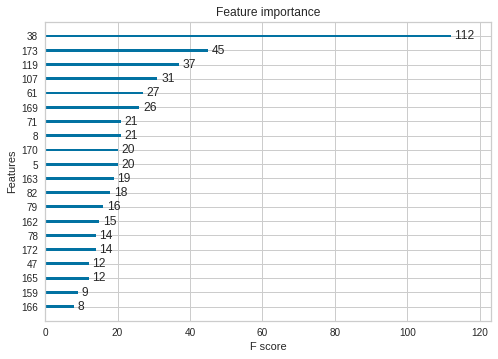

In [ ]:
plot_importance(xgb, max_num_features = 20)
plt.show()

In [ ]:
xg_top_20 = [38,173,119,107,61,169,71,8,170,5,163,82,79,162,78,172,47,165,159,166]

# **# Feature Importance Random Forest**

In [ ]:
target_col = '155'
X = new_training_data.drop(columns = target_col)
y = new_training_data[target_col]

In [ ]:
np.where(np.isnan(new_training_data))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
new_training_data

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,...,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.001355,0.001355,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097951,1.0,0.833713,0.311853,0.0,1.0,1.0,0.210037,1.0,0.365186,0.189119,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.478906,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.130452,2.019179,0.0,3.437912,0.000000,0.0,2.398627,4.905141,9.230534,0.247566,1.301265,6.991286,0.0,5.273437,0.430362,6.690270,5.878229,6.172361,2.442509,4.669212
2,0.984044,0.984044,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097972,1.0,0.000000,0.311853,1.0,0.0,1.0,0.107429,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.666151,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.227297,1.108627,0.0,0.493985,5.689376,0.0,5.281132,0.488145,8.634562,5.087472,0.322069,10.017487,0.0,5.809144,2.287603,5.353325,4.268111,8.720732,4.975452,2.576712
3,0.454423,0.454423,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097998,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.280648,1.0,1.0,1.0,1.0,1.0,...,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.786048,1.078007,0.0,0.645862,3.902435,0.0,0.704665,1.033955,4.089727,1.778690,14.530180,9.707388,0.0,4.622783,13.906604,5.112334,2.626395,3.435877,11.664709,2.678468
4,0.983273,0.983273,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098019,1.0,0.000000,0.311853,1.0,0.0,1.0,0.127632,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.668130,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.341288,2.697501,0.0,6.632360,4.363337,0.0,2.111492,0.914630,2.758115,2.695528,16.572840,4.303847,0.0,1.646414,11.101099,3.872189,0.358404,7.072316,14.743063,0.000000
5,0.452580,0.452580,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098072,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.286817,1.0,1.0,1.0,1.0,1.0,...,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.171860,0.390738,0.0,0.000000,4.748557,0.0,0.000000,1.991619,2.504288,3.123602,13.051509,9.222284,0.0,5.036245,15.323595,5.829150,4.359610,2.627598,12.023986,3.275248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.984801,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999700,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.610956,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.614935,1.612475,0.0,1.817972,6.624434,0.0,1.398236,0.000000,5.495990,1.045301,12.345723,10.704359,0.0,6.635345,13.781002,6.965048,3.178401,3.106994,8.170262,4.442095
96493,0.880335,0.880335,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.611736,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# **Top 20 based on Random Fores**

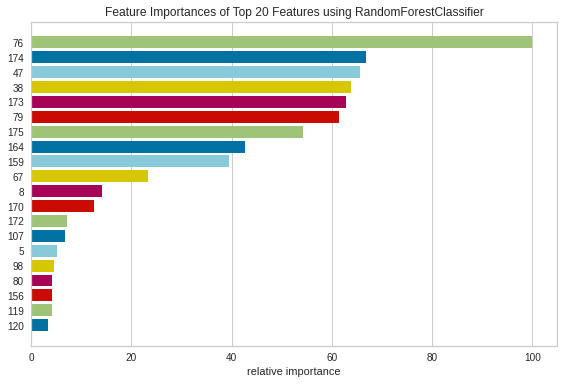

In [ ]:
RFC = RandomForestClassifier(n_estimators=10)
Rf_features = FeatureImportances(RFC, topn=20)
Rf_features.fit(X, y)
Rf_features.show()

In [ ]:
rfc_top_20 = [76, 174, 47, 38, 173, 79, 175, 164, 159, 67, 8, 170, 172, 107, 5, 98, 80, 156, 119, 120]

In [ ]:
print(xg_top_20)

[38, 173, 119, 107, 61, 169, 71, 8, 170, 5, 163, 82, 79, 162, 78, 172, 47, 165, 159, 166]


In [ ]:
xg_top_20 = list(xg_top_20)


In [ ]:
xg_20 =[]
for i in xg_top_20:
  xg_20.append(i)

In [ ]:
(set(xg_20) & set(rfc_top_20)) 

{5, 8, 38, 47, 79, 107, 119, 159, 170, 172, 173}

In [ ]:
intersection = (set(xg_20) & set(rfc_top_20)) 
intersection

{5, 8, 38, 47, 79, 107, 119, 159, 170, 172, 173}

# **Intersection of the top 20 from each one**

In [ ]:
intersection = list(intersection)

In [ ]:
print(intersection)

[5, 38, 8, 170, 107, 172, 173, 47, 79, 119, 159]


In [ ]:
new_training_data.columns

Index([  '5',   '6',   '8',   '9',  '14',  '15',  '16',  '18',  '20',  '26',
        '29',  '38',  '43',  '47',  '48',  '50',  '51',  '52',  '61',  '62',
        '64',  '66',  '67',  '68',  '70',  '71',  '72',  '73',  '75',  '76',
        '77',  '78',  '79',  '80',  '82',  '89',  '90',  '93',  '94',  '98',
       '104', '105', '106', '107', '108', '109', '110', '111', '112', '118',
       '119', '120', '121', '122', '123', '125', '126', '127', '128', '129',
       '130', '140', '141', '142', '143', '144', '145', '146', '154', '155',
         156,   157,   158,   159,   160,   161,   162,   163,   164,   165,
         166,   167,   168,   169,   170,   171,   172,   173,   174,   175],
      dtype='object')

In [ ]:
for i in intersection:
  print(type(i))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [ ]:
new_training_data['155']

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
96492    1.0
96493    1.0
96494    1.0
96495    1.0
96496    1.0
Name: 155, Length: 96496, dtype: float64

In [ ]:
for col in new_training_data.columns:
  if int(col) in intersection:
    print(col)

5
8
38
47
79
107
119
159
170
172
173


In [ ]:
target_value = 155
intersection.append(target_value)

In [ ]:
intersection

[5, 38, 8, 170, 107, 172, 173, 47, 79, 119, 159, 155]

In [ ]:
#Our training data and test data will now be reduced to these features highlighted.

In [ ]:
XC_training_set = new_training_data.drop(columns=[col for col in new_training_data if int(col) not in intersection])




In [ ]:
XC_training_set

,5,8,38,47,79,107,119,155,159,170,172,173
1,0.001355,0.000000,0.097951,0.833713,0.000000,0.0,0.000000,0.0,3.437912,0.430362,5.878229,6.172361
2,0.984044,0.397040,0.097972,0.000000,0.106476,1.0,0.988222,0.0,0.493985,2.287603,4.268111,8.720732
3,0.454423,0.489359,0.097998,0.000000,0.054760,1.0,0.930450,0.0,0.645862,13.906604,2.626395,3.435877
4,0.983273,0.397040,0.098019,0.000000,0.106476,1.0,0.988222,0.0,6.632360,11.101099,0.358404,7.072316
5,0.452580,0.489359,0.098072,0.000000,0.054760,1.0,0.930450,0.0,0.000000,15.323595,4.359610,2.627598
...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.244511,0.999700,0.000000,0.106476,0.0,0.988222,1.0,1.817972,13.781002,3.178401,3.106994
96493,0.880335,0.244511,0.999800,0.000000,0.106476,0.0,0.988222,1.0,1.834910,13.769732,3.179218,3.104188
96494,0.992279,0.244511,0.999867,0.000000,0.106476,0.0,0.988222,1.0,2.249545,13.485456,3.177430,3.026686
96495,0.390683,0.244511,0.999933,0.000000,0.106476,0.0,0.988222,1.0,1.805661,13.790848,3.182255,3.110784


In [ ]:
new_test_data

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,...,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.428933,0.428933,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.163331,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.716484,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.936416,0.00000,0.588692,0.0,0.0,0.996993,0.996993,0.999699,0.0,0.820046,7.125221,0.0,3.401871,4.289578,0.0,5.867132,6.979322,9.327190,2.786460,0.801698,0.000000,0.0,2.045393,2.575605,0.417600,0.860120,8.558715,3.538338,3.040443
2,0.427806,0.427806,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.150337,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.720945,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.964450,0.00000,0.883332,0.0,0.0,0.996993,0.996993,0.999699,0.0,1.254884,7.176077,0.0,2.949846,4.014230,0.0,6.167532,7.667096,9.167235,2.881220,1.042215,0.000000,0.0,1.934903,2.972864,0.581093,1.147148,8.697284,3.637783,2.726452
3,0.635561,0.635561,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,0.789572,0.381679,0.0,1.0,1.0,0.244763,1.0,0.339866,0.099861,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.520088,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.809166,7.323064,0.0,3.087023,4.240598,0.0,6.170571,7.181289,9.390794,2.674079,0.906602,0.000000,0.0,1.741040,2.872365,0.448174,0.782302,8.515031,3.378692,3.156090
4,0.227296,0.227296,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.163331,1.0,0.767193,1.000000,0.784532,1.0,1.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.731200,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990338,0.00000,0.990381,0.0,0.0,0.996993,0.996993,0.999699,0.0,5.795209,1.339968,0.0,0.000000,5.446541,0.0,5.107829,0.280316,10.470471,5.167626,2.102854,9.281573,0.0,5.596854,4.188964,5.270804,4.342189,9.005759,4.230468,2.810763
5,0.258729,0.258729,0.999644,0.999644,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195504,1.0,1.000000,0.381679,0.0,1.0,1.0,0.150337,1.0,0.767193,1.000000,0.784532,1.0,0.0,0.0,0.0,1.0,0.029566,0.218081,0.136695,0.413951,0.000448,0.44513,0.731600,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990826,0.00000,0.958893,0.0,0.0,0.996993,0.996993,0.999699,0.0,0.150010,4.970652,0.0,5.307091,0.894896,0.0,6.579438,7.201422,9.941919,0.000000,1.361579,0.000000,0.0,0.859866,1.173994,0.326350,1.239637,8.300921,1.938497,2.999693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39873,0.248397,0.248397,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.150337,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.428454,0.44513,0.453538,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000045,0.99929,0.774620,0.0,0.0,0.000000,0.000000,0.019519,1.0,4.992757,6.380921,0.0,3.993149,7.058021,0.0,1.034351,4.641254,7.411036,2.975670,3.025191,1.742961,0.0,5.874811,4.299314,5.993733,4.307529,1.269987,0.894967,6.996103
39874,0.330496,0.330496,0.110262,0.110262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.381679,1.0,0.0,1.0,0.163331,1.0,0.430580,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.191298,0.703954,0.520222,0.413951,0.4

In [ ]:
new_training_data

,5,6,8,9,14,15,16,18,20,26,29,38,43,47,48,50,51,52,61,62,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,89,90,93,94,98,...,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,146,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
1,0.001355,0.001355,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097951,1.0,0.833713,0.311853,0.0,1.0,1.0,0.210037,1.0,0.365186,0.189119,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.478906,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.130452,2.019179,0.0,3.437912,0.000000,0.0,2.398627,4.905141,9.230534,0.247566,1.301265,6.991286,0.0,5.273437,0.430362,6.690270,5.878229,6.172361,2.442509,4.669212
2,0.984044,0.984044,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097972,1.0,0.000000,0.311853,1.0,0.0,1.0,0.107429,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.666151,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.227297,1.108627,0.0,0.493985,5.689376,0.0,5.281132,0.488145,8.634562,5.087472,0.322069,10.017487,0.0,5.809144,2.287603,5.353325,4.268111,8.720732,4.975452,2.576712
3,0.454423,0.454423,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.097998,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.280648,1.0,1.0,1.0,1.0,1.0,...,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.786048,1.078007,0.0,0.645862,3.902435,0.0,0.704665,1.033955,4.089727,1.778690,14.530180,9.707388,0.0,4.622783,13.906604,5.112334,2.626395,3.435877,11.664709,2.678468
4,0.983273,0.983273,0.397040,0.397040,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098019,1.0,0.000000,0.311853,1.0,0.0,1.0,0.127632,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.668130,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.341288,2.697501,0.0,6.632360,4.363337,0.0,2.111492,0.914630,2.758115,2.695528,16.572840,4.303847,0.0,1.646414,11.101099,3.872189,0.358404,7.072316,14.743063,0.000000
5,0.452580,0.452580,0.489359,0.489359,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.098072,1.0,0.000000,0.311853,1.0,0.0,1.0,0.003081,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.126222,0.054760,0.075973,0.286817,1.0,1.0,1.0,1.0,1.0,...,0.930450,0.999996,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.171860,0.390738,0.0,0.000000,4.748557,0.0,0.000000,1.991619,2.504288,3.123602,13.051509,9.222284,0.0,5.036245,15.323595,5.829150,4.359610,2.627598,12.023986,3.275248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.984801,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999700,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.610956,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.614935,1.612475,0.0,1.817972,6.624434,0.0,1.398236,0.000000,5.495990,1.045301,12.345723,10.704359,0.0,6.635345,13.781002,6.965048,3.178401,3.106994,8.170262,4.442095
96493,0.880335,0.880335,0.244511,0.244511,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,1.0,0.000000,0.311853,1.0,0.0,1.0,0.151144,1.0,0.039841,0.000000,0.739397,0.0,0.0,0.0,0.0,0.0,0.0,0.150490,0.211305,0.236423,0.106476,0.123354,0.611736,1.0,1.0,1.0,0.0,1.0,...,0.988222,0.999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
XC_test_set = new_test_data.drop(columns=[col for col in new_test_data if int(col) not in intersection])
XC_test_set

,5,8,38,47,79,107,119,155,159,170,172,173
1,0.428933,0.999644,0.195504,1.000000,0.000448,0.0,0.0,0.0,3.401871,2.575605,0.860120,8.558715
2,0.427806,0.999644,0.195504,1.000000,0.000448,0.0,0.0,0.0,2.949846,2.972864,1.147148,8.697284
3,0.635561,0.000000,0.195504,0.789572,0.000000,0.0,0.0,0.0,3.087023,2.872365,0.782302,8.515031
4,0.227296,0.999644,0.195504,1.000000,0.000448,0.0,0.0,0.0,0.000000,4.188964,4.342189,9.005759
5,0.258729,0.999644,0.195504,1.000000,0.000448,0.0,0.0,0.0,5.307091,1.173994,1.239637,8.300921
...,...,...,...,...,...,...,...,...,...,...,...,...
39873,0.248397,0.110262,1.000000,0.000000,0.428454,0.0,0.0,1.0,3.993149,4.299314,4.307529,1.269987
39874,0.330496,0.110262,1.000000,0.000000,0.428454,0.0,0.0,1.0,4.344905,4.684090,4.156992,1.668305
39875,0.396460,0.110262,1.000000,0.000000,0.428454,0.0,0.0,1.0,4.057097,4.802193,4.057076,1.655330
39876,0.801192,0.110262,1.000000,0.000000,0.999973,0.0,0.0,1.0,3.810239,4.962733,4.073294,1.683090


In [ ]:
XC_test_set

,5,8,38,47,79,107,119,155,159,170,172,173
1,0.428933,0.999644,0.195504,1.000000,0.000448,0.0,0.0,0.0,3.401871,2.575605,0.860120,8.558715
2,0.427806,0.999644,0.195504,1.000000,0.000448,0.0,0.0,0.0,2.949846,2.972864,1.147148,8.697284
3,0.635561,0.000000,0.195504,0.789572,0.000000,0.0,0.0,0.0,3.087023,2.872365,0.782302,8.515031
4,0.227296,0.999644,0.195504,1.000000,0.000448,0.0,0.0,0.0,0.000000,4.188964,4.342189,9.005759
5,0.258729,0.999644,0.195504,1.000000,0.000448,0.0,0.0,0.0,5.307091,1.173994,1.239637,8.300921
...,...,...,...,...,...,...,...,...,...,...,...,...
39873,0.248397,0.110262,1.000000,0.000000,0.428454,0.0,0.0,1.0,3.993149,4.299314,4.307529,1.269987
39874,0.330496,0.110262,1.000000,0.000000,0.428454,0.0,0.0,1.0,4.344905,4.684090,4.156992,1.668305
39875,0.396460,0.110262,1.000000,0.000000,0.428454,0.0,0.0,1.0,4.057097,4.802193,4.057076,1.655330
39876,0.801192,0.110262,1.000000,0.000000,0.999973,0.0,0.0,1.0,3.810239,4.962733,4.073294,1.683090


In [ ]:
XC_training_set

,5,8,38,47,79,107,119,155,159,170,172,173
1,0.001355,0.000000,0.097951,0.833713,0.000000,0.0,0.000000,0.0,3.437912,0.430362,5.878229,6.172361
2,0.984044,0.397040,0.097972,0.000000,0.106476,1.0,0.988222,0.0,0.493985,2.287603,4.268111,8.720732
3,0.454423,0.489359,0.097998,0.000000,0.054760,1.0,0.930450,0.0,0.645862,13.906604,2.626395,3.435877
4,0.983273,0.397040,0.098019,0.000000,0.106476,1.0,0.988222,0.0,6.632360,11.101099,0.358404,7.072316
5,0.452580,0.489359,0.098072,0.000000,0.054760,1.0,0.930450,0.0,0.000000,15.323595,4.359610,2.627598
...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.984801,0.244511,0.999700,0.000000,0.106476,0.0,0.988222,1.0,1.817972,13.781002,3.178401,3.106994
96493,0.880335,0.244511,0.999800,0.000000,0.106476,0.0,0.988222,1.0,1.834910,13.769732,3.179218,3.104188
96494,0.992279,0.244511,0.999867,0.000000,0.106476,0.0,0.988222,1.0,2.249545,13.485456,3.177430,3.026686
96495,0.390683,0.244511,0.999933,0.000000,0.106476,0.0,0.988222,1.0,1.805661,13.790848,3.182255,3.110784


In [ ]:
from google.colab import files
XC_training_set.to_csv('XC_training_set.csv') 
files.download('XC_training_set.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
XC_test_set.to_csv('XC_test_set.csv') 
files.download('XC_test_set.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving XC_test_set.csv to XC_test_set.csv
Saving XC_training_set.csv to XC_training_set.csv


In [ ]:
import io


In [ ]:
#Saving Auto Encoder Dataset

In [ ]:
XC_training_set = pd.read_csv(io.BytesIO(uploaded['XC_training_set.csv']))


XC_test_set = pd.read_csv(io.BytesIO(uploaded['XC_test_set.csv']))


In [ ]:
#AutoEncoder Dataset Performance in Gridsearch

In [ ]:
classifiers = [LogisticRegression(max_iter=1000),
               DecisionTreeClassifier(),
               RandomForestClassifier(), AdaBoostClassifier(), XGBClassifier()]

In [ ]:
for algo in classifiers:
    
    pipe = make_pipeline(algo)
    
    grid = GridSearchCV(estimator = pipe, param_grid = {}, cv=10, scoring= "recall")
    
    grid.fit(X_train, y_train)
    
    print(f"Train Score for {algo}: {grid.best_score_}")
    print(f"Best params: {grid.best_params_}")
    print("")

In [ ]:
# Log Reg best parameters

In [ ]:
pipe = make_pipeline(LogisticRegression(max_iter = 100))
param_grid_logreg = {"logisticregression__C": [0.1, 1, 10, 100, 1000]}

In [ ]:
grid_logreg = GridSearchCV(estimator = pipe, param_grid=param_grid_logreg, cv=5)

grid_logreg.fit(X_train, y_train)

print("Best score:", grid_logreg.best_score_)
print("Best parameters:", grid_logreg.best_params_)



In [ ]:
# Decision Tree

In [ ]:
pipe = make_pipeline(DecisionTreeClassifier())


In [ ]:
param_grid_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}


decision_tree_model = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5)

decision_tree_model.fit(X_train, y_train)

print("Best score:", decision_tree_model.best_score_)
print("Best parameters:", decision_tree_model.best_params_)

In [ ]:
# Adaboost


In [ ]:
param_grid_ada = {'n_estimators':[10, 20, 50], 'learning_rate':[0.0001, 0.001, 0.01, 0.1]}


grid_ada = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=param_grid_ada, cv=5)

grid_ada.fit(X_train, y_train)

print("Best score:", grid_ada.best_score_)
print("Best parameters:", grid_ada.best_params_)

In [ ]:
# Random Forest


In [ ]:
pipe = make_pipeline(RandomForestClassifier())

In [ ]:
param_grid_rf = {"randomforestclassifier__min_samples_leaf": [1,2,4],
                     "randomforestclassifier__max_depth": [10,20, None],
                    "randomforestclassifier__n_estimators": [100]}
grid_rf = GridSearchCV(estimator = pipe, param_grid=param_grid_rf, cv=5)

grid_rf.fit(X_train, y_train)

print("Best score:", grid_rf.best_score_)
print("Best parameters:", grid_rf.best_params_)

In [ ]:
## XGB - Classifier


In [ ]:
xgb_model = XGBClassifier()

In [ ]:
pipe = make_pipeline(XGBClassifier())

In [ ]:
param_grid_xgb = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4, 5, 10]
        }

grid_xgb = GridSearchCV(estimator = XGBClassifier(), param_grid=param_grid_xgb, cv=5)

grid_xgb.fit(X_train, y_train)

print("Best score:", grid_xgb.best_score_)
print("Best parameters:", grid_xgb.best_params_)



In [ ]:
## Best Model results on training data


In [ ]:
log_reg_best_model = grid_logreg.best_estimator_

In [ ]:
log_reg_best_model.score(X_train, y_train)

In [ ]:
# Decision Tree


In [ ]:
dct_best_model = decision_tree_model.best_estimator_

In [ ]:
decision_tree_model.score(X_train, y_train)

In [ ]:
# Adaboost


In [ ]:
ada_boost_best_model = grid_ada.best_estimator_

In [ ]:
ada_boost_best_model.score(X_train, y_train)


In [ ]:
# Random Forest 


In [ ]:
grid_rf_best_model = grid_rf.best_estimator_

In [ ]:
grid_rf_best_model.score(X_train, y_train)


In [ ]:
# XGB Boost

In [ ]:
grid_xgb_best_model = grid_xgb.best_estimator_

In [ ]:
grid_xgb_best_model.score

In [ ]:
# Evaluating Models on Test Dataa

In [ ]:
# Log reg evaluation

In [ ]:
y_test_pred = log_reg_best_model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(log_reg_best_model, X_test, y_test)

In [ ]:
y_test_pred = log_reg_best_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score: {accuracy}")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print(f"MCC score: {mcc}")
print(f1_score(y_test, y_test_pred))


In [ ]:
# Decision Tree

In [ ]:
y_test_pred = decision_tree_model.predict(X_test)

In [ ]:
plot_confusion_matrix(decision_tree_model, X_test, y_test_pred)

In [ ]:
metric = "recall"
y_test_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
print(f1_score(y_test, y_test_pred))
mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Scoring metric in GridSearchCV: {metric}\n")
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"MCC score: {mcc}")
print(f"F1 score:")
print(f1_score(y_test, y_test_pred))

In [ ]:
# Evaluating Random Forest


In [ ]:
y_test_pred = grid_rf_best_model.predict(X_test)
plot_confusion_matrix(grid_rf_best_model, X_test, y_test_pred)

In [ ]:
# predictions for test data
metric = "recall"
y_test_pred = grid_rf_best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
print(f1_score(y_test, y_test_pred))
mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Scoring metric in GridSearchCV: {metric}\n")
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"MCC score: {mcc}")
print(f"F1 score:")
print(f1_score(y_test, y_test_pred))

#A system with high precision but low recall returns very few results, 
#but most of its predicted labels are correct when compared to the training labels

In [ ]:
# Evaluating Ada Boost


In [ ]:
y_test_pred = ada_boost_best_model.predict(X_test)
plot_confusion_matrix(ada_boost_best_model, X_test, y_test)


In [ ]:
# predictions for test data
metric = "recall"
y_test_pred = ada_boost_best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Scoring metric in GridSearchCV: {metric}\n")
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"MCC score: {mcc}")
print(f"F1 score:")
print(f1_score(y_test, y_test_pred))

In [ ]:
# XGBoost evaluation
y_test_pred = grid_xgb_best_model.predict(X_test)
plot_confusion_matrix(grid_xgb_best_model, X_test, y_test)

In [ ]:
# predictions for test data
metric = "recall"
y_test_pred = grid_xgb_best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
#f1_score = f1_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Scoring metric in GridSearchCV: {metric}\n")
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"F1 score:")
print(f1_score(y_test, y_test_pred))
print(f"MCC score: {mcc}")

In [ ]:
# ChiSquared for the Autoencoder Dataset

In [ ]:
ae_df_train = pd.read_csv("new_training_data.csv")
ae_df_test = pd.read_csv("new_test_data.csv")

In [ ]:
#This dataset already came preprocessed so no need to preprocess we will simply use ChiSquared

In [ ]:
target_col = '155'
X_train = ae_df_train.drop(columns = target_col)
y_train = ae_df_train[target_col]

In [ ]:
target_col = '155'
X_test = ae_df_test.drop(columns = target_col)
y_test = ae_df_test[target_col]

In [ ]:
test = SelectKBest(score_func=chi2, k=20)
fit = test.fit(X_train, y_train)

In [ ]:
set_printoptions(precision=20)
print(fit.scores_)
features = fit.transform(X_train)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)


In [ ]:
featureScores.columns = ['feature','Score']

In [ ]:
print(featureScores.nlargest(10,'Score'))

In [ ]:
#First pipeline with Logistic Regression

In [ ]:
pipe = make_pipeline(preprocessor,SelectKBest(chi2), LogisticRegression())

In [ ]:
param_grid_logreg = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82],
                     'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000]}

grid_logreg = GridSearchCV(estimator = pipe, param_grid=param_grid_logreg, scoring="accuracy", n_jobs=-1, cv=5)


In [ ]:
grid_logreg.fit(X_train, y_train)

print("Best score:", grid_logreg.best_score_)
print("Best parameters:", grid_logreg.best_params_)

In [ ]:
log_reg_best_model = grid_logreg.best_estimator_


In [ ]:
y_test_pred = log_reg_best_model.predict(X_test)


In [ ]:
%%time
precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# XGBoost


In [ ]:
pipe = make_pipeline(preprocessor,SelectKBest(chi2), XGBClassifier())

In [ ]:
param_grid_xgb = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82]}
grid_xgb = GridSearchCV(estimator = pipe, param_grid=param_grid_xgb, scoring="accuracy", n_jobs=-1, cv=5)
grid_xgb.fit(X_train, y_train)

print("Best score:", grid_xgb.best_score_)
print("Best parameters:", grid_xgb.best_params_)

In [ ]:
xgb_best_model = grid_xgb.best_estimator_


In [ ]:
%%time
y_test_pred = xgb_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# AdaBoost


In [ ]:
pipe = make_pipeline(preprocessor,SelectKBest(chi2), AdaBoostClassifier())

In [ ]:
param_grid_ada = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82]}


In [ ]:
grid_ada = GridSearchCV(estimator = pipe, param_grid=param_grid_ada, scoring="accuracy", n_jobs=-1, cv=5)
grid_ada.fit(X_train, y_train)

print("Best score:", grid_ada.best_score_)
print("Best parameters:", grid_ada.best_params_)

In [ ]:
ada_best_model = grid_ada.best_estimator_


In [ ]:
%%time
y_test_pred = ada_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# Decision Tree


In [ ]:
pipe = make_pipeline(preprocessor,SelectKBest(chi2), DecisionTreeClassifier())

In [ ]:
param_grid_dt = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82]}

In [ ]:

grid_dt = GridSearchCV(estimator = pipe, param_grid=param_grid_dt, scoring="accuracy", n_jobs=-1, cv=5)

grid_dt.fit(X_train, y_train)

print("Best score:", grid_dt.best_score_)
print("Best parameters:", grid_dt.best_params_)

In [ ]:
dt_best_model = grid_dt.best_estimator_


In [ ]:
y_test_pred = dt_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# Random Forest


In [ ]:
pipe = make_pipeline(preprocessor,SelectKBest(chi2), RandomForestClassifier())


In [ ]:
param_grid_rf = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82]}
grid_rf = GridSearchCV(estimator = pipe, param_grid=param_grid_rf, scoring="accuracy", n_jobs=-1, cv=5)
grid_rf.fit(X_train, y_train)

print("Best score:", grid_rf.best_score_)
print("Best parameters:", grid_rf.best_params_)

In [ ]:
rf_best_model = grid_rf.best_estimator_
y_test_pred = rf_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

**Using Principal Component Analysis to Generate New Features**

In [ ]:
df_train = pd.read_csv("train_imperson_without4n7_balanced_data.csv")
df_test = pd.read_csv("test_imperson_without4n7_balanced_data.csv")

In [ ]:
#Scaling Training Data

In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train)


In [ ]:
pca = PCA(n_components=7)
pca.fit(scaled_train)

In [ ]:
pca.fit(scaled_train)

In [ ]:
#Variance ratio

In [ ]:
pca.explained_variance_ratio_


In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
#PCA of 7 components gives us 92% 

In [ ]:
pca = PCA(n_components=7)
pca_1_to_7 = pca.fit_transform(scaled_train)



In [ ]:
pca_1_to_7 = scaler.fit_transform(pca_1_to_7)


In [ ]:
pca_1_to_7.shape

In [ ]:
pc1 = pca_1_to_7[:,0]
pc2 = pca_1_to_7[:,1]
pc3 = pca_1_to_7[:,2]
pc4 = pca_1_to_7[:,3]
pc5 = pca_1_to_7[:,4]
pc6 = pca_1_to_7[:,5]
pc7 = pca_1_to_7[:,6]

In [ ]:
#Adding PCA results to DF

In [ ]:
df_train["pc1"] = pc1 = pca_1_to_7[:,0]
df_train["pc2"] = pc2 = pca_1_to_7[:,1]
df_train["pc3"] = pc3 = pca_1_to_7[:,2]
df_train["pc4"] = pc4 = pca_1_to_7[:,3]
df_train["pc5"] = pc5 = pca_1_to_7[:,4]
df_train["pc6"] = pc6 = pca_1_to_7[:,5]
df_train["pc7"] = pc7 = pca_1_to_7[:,6]




In [ ]:
# PCA ON Test data

In [ ]:
scaler = MinMaxScaler()
scaled_test = scaler.fit_transform(df_test)


In [ ]:
pca = PCA(n_components=7)


In [ ]:
pca.fit(scaled_test)


In [ ]:
pca.explained_variance_ratio_.cumsum()


In [ ]:
pca_1_to_7 = pca.fit_transform(scaled_test)


In [ ]:
pca_1_to_7 = scaler.fit_transform(pca_1_to_7)


In [ ]:
pc1 = pca_1_to_7[:,0]
pc2 = pca_1_to_7[:,1]
pc3 = pca_1_to_7[:,2]
pc4 = pca_1_to_7[:,3]
pc5 = pca_1_to_7[:,4]
pc6 = pca_1_to_7[:,5]
pc7 = pca_1_to_7[:,6]


In [ ]:
#Concatenating PCA with DF

In [ ]:
df_test["pc1"] = pc1 = pca_1_to_7[:,0]
df_test["pc2"] = pc2 = pca_1_to_7[:,1]
df_test["pc3"] = pc3 = pca_1_to_7[:,2]
df_test["pc4"] = pc4 = pca_1_to_7[:,3]
df_test["pc5"] = pc5 = pca_1_to_7[:,4]
df_test["pc6"] = pc6 = pca_1_to_7[:,5]
df_test["pc7"] = pc7 = pca_1_to_7[:,6]




In [ ]:
target_col = '155'
X_train = df_train.drop(columns = target_col)
y_train = df_train[target_col]

In [ ]:
target_col = '155'
X_test = df_test.drop(columns = target_col)
y_test = df_test[target_col]

In [ ]:
#PCA + Dataset - Modelling

In [ ]:
# LogReg Model With PCA

In [ ]:
pipe = make_pipeline(VarianceThreshold(), LogisticRegression())

param_grid_logreg = {}

In [ ]:
grid_logreg = GridSearchCV(estimator = pipe, param_grid=param_grid_logreg, scoring="accuracy", n_jobs=-1, cv=5)

grid_logreg.fit(X_train, y_train)

print("Best score:", grid_logreg.best_score_)
print("Best parameters:", grid_logreg.best_params_)



In [ ]:
log_reg_best_model = grid_logreg.best_estimator_


In [ ]:
y_test_pred = log_reg_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# Decision Tree with PCA


In [ ]:
pipe = make_pipeline(VarianceThreshold(), DecisionTreeClassifier())

param_grid_dt = {}

In [ ]:
grid_dt = GridSearchCV(estimator = pipe, param_grid=param_grid_dt, scoring="accuracy", n_jobs=-1, cv=5)

grid_dt.fit(X_train, y_train)

print("Best score:", grid_dt.best_score_)
print("Best parameters:", grid_dt.best_params_)



In [ ]:
dt_best_model = grid_dt.best_estimator_


In [ ]:
# Random Forest with PCA


In [ ]:
pipe = make_pipeline(VarianceThreshold(), RandomForestClassifier())

param_grid_rf = {}

In [ ]:
grid_rf = GridSearchCV(estimator = pipe, param_grid=param_grid_rf, scoring="accuracy", n_jobs=-1, cv=5)

grid_rf.fit(X_train, y_train)

print("Best score:", grid_rf.best_score_)
print("Best parameters:", grid_rf.best_params_)



In [ ]:
rf_best_model = grid_rf.best_estimator_


In [ ]:
y_test_pred = rf_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# Adaboost Model 

In [ ]:
pipe = make_pipeline(VarianceThreshold(), AdaBoostClassifier())

param_grid_ada = {}

In [ ]:
grid_ada = GridSearchCV(estimator = pipe, param_grid=param_grid_ada, scoring="accuracy", n_jobs=-1, cv=5)

grid_ada.fit(X_train, y_train)

print("Best score:", grid_ada.best_score_)
print("Best parameters:", grid_ada.best_params_)



In [ ]:
ada_best_model = grid_ada.best_estimator_
y_test_pred = ada_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# XGBoost 

In [ ]:
pipe = make_pipeline(VarianceThreshold(), XGBClassifier())

param_grid_xgb = {}

In [ ]:
grid_xgb = GridSearchCV(estimator = pipe, param_grid=param_grid_xgb, scoring="accuracy", n_jobs=-1, cv=5)

grid_xgb.fit(X_train, y_train)

print("Best score:", grid_xgb.best_score_)
print("Best parameters:", grid_xgb.best_params_)



In [ ]:
xgb_best_model = grid_xgb.best_estimator_


In [ ]:
y_test_pred = xgb_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
# Dataset Selected - PCA features generated + Original Dataset as the best dataset for our models. Now further refining

In [ ]:
#Pipeline 1

In [ ]:
pipe = make_pipeline(preprocessor,SelectKBest(chi2),AdaBoostClassifier())
param_grid_ada = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82],'adaboostclassifier__n_estimators':[10, 20], 'adaboostclassifier__learning_rate':[0.0001, 0.001, 0.01]}


In [ ]:
grid_ada = GridSearchCV(estimator = pipe, param_grid=param_grid_ada, scoring="accuracy", n_jobs=-1, cv=10)
grid_ada.fit(X_train, y_train)

print("Best score:", grid_ada.best_score_)
print("Best parameters:", grid_ada.best_params_)

In [ ]:
ada_best_model = grid_ada.best_estimator_
%%time
y_test_pred = ada_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
#Pipeline 2

In [ ]:
pipe2 = make_pipeline(VarianceThreshold(),SelectKBest(f_classif),AdaBoostClassifier())


In [ ]:
param_grid_ada = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82, 'pc1'],'adaboostclassifier__n_estimators':[10, 20], 'adaboostclassifier__learning_rate':[0.0001, 0.001, 0.01]}


In [ ]:
grid_ada = GridSearchCV(estimator = pipe2, param_grid=param_grid_ada, scoring="accuracy", n_jobs=-1, cv=5)
grid_ada.fit(X_train, y_train)

print("Best score:", grid_ada.best_score_)
print("Best parameters:", grid_ada.best_params_)

In [ ]:
ada_best_model2 = grid_ada.best_estimator_


In [ ]:
%%time
y_test_pred = ada_best_model2.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))

In [ ]:
#Pipeline 3

In [ ]:
pipe3 = make_pipeline(preprocessor,SelectKBest(chi2),LogisticRegression())


In [ ]:
param_grid_log_reg = {'selectkbest__k':[71,51,67,47, 154,50,8,9,68,82],
                      'logisticregression__C':[0.1, 1, 10, 100, 1000]}

                      

In [ ]:
grid_log_reg = GridSearchCV(estimator = pipe3, param_grid=param_grid_log_reg, scoring="precision", n_jobs=-1, cv=5)
grid_log_reg.fit(X_train, y_train)

print("Best score:", grid_log_reg.best_score_)
print("Best parameters:", grid_log_reg.best_params_)

In [ ]:
log_reg_best_model = grid_log_reg.best_estimator_


In [ ]:
%%time
y_test_pred = log_reg_best_model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)


print(f"Accuracy score:, {accuracy}")
print('precision:',(precision))
print('recall:',(recall))
print(f"MCC score: {mcc}")
print("F1 score")
print(classification_report(y_test, y_test_pred))